In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.optimize import curve_fit
rc('font',**{'size':16})
rc('lines', **{'linewidth':3.0})
rc('savefig', **{'facecolor':'white'})
rc('axes', **{'labelsize':16})
rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

In [3]:
data = np.genfromtxt('/Users/chris/Desktop/ldmx/ldmx_files/simparticleinfo_4gev_1e_tskim_v12_kaons_ldmx-det-v12_bdt_hcal_skimmed.txt',delimiter=',')
ids = data[:,0]
E = data[:,1]
pz = data[:,2]
py = data[:,3]
px = data[:,4]
z = data[:,5]
y = data[:,6]
x = data[:,7]
numdaughters = data[:,8]

kmass = 493.7
KE = E - kmass

r = np.sqrt(px**2 + py**2)
tan_theta = r/np.abs(pz)
theta = np.arctan(tan_theta) * 180/np.pi

In [1]:
Wthick_A_dz = 0.75
W_A_dz = 0.75
Wthick_B_dz = 2.25
W_B_dz = 1.5
Wthick_C_dz = 3.5
W_C_dz = 1.75
Wthick_D_dz = 7.0
W_D_dz = 3.5
CFMix_dz = 0.05
CFMixThick_dz = 0.2
PCB_dz = 1.5
Si_dz = 0.5
C_dz = 0.5
Al_dz = 2.0

# limited by construction
FrontTolerance = 0.5

#gap between layers
BackTolerance = 0.5

#air separting PCBs from PCB MotherBoards
PCB_Motherboard_Gap = 2.3

#Air separating Carbon sheets in the middle of a layer
CoolingAirGap = 4.0

#Preshower thickness is 20.1 mm --> 
preshower_Thickness = Al_dz + FrontTolerance + PCB_dz + PCB_Motherboard_Gap 
+ PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz + CoolingAirGap 
+ 2.*C_dz + CFMixThick_dz + Si_dz + CFMix_dz + PCB_dz 
+ PCB_Motherboard_Gap + PCB_dz + BackTolerance

#Layer A thickness is 20.35 mm --> 
layer_A_Thickness = Wthick_A_dz + FrontTolerance + PCB_dz + PCB_Motherboard_Gap 
+ PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz + W_A_dz + C_dz 
+ CoolingAirGap + C_dz + W_A_dz + CFMixThick_dz + Si_dz 
+ CFMix_dz + PCB_dz + PCB_Motherboard_Gap + PCB_dz 
+ BackTolerance

#Layer B thickness is 22.35 mm --> 
layer_B_Thickness = Wthick_B_dz + FrontTolerance + PCB_dz + PCB_Motherboard_Gap 
+ PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz + W_B_dz + C_dz 
+ CoolingAirGap + C_dz + W_B_dz + CFMixThick_dz + Si_dz 
+ CFMix_dz + PCB_dz + PCB_Motherboard_Gap + PCB_dz 
+ BackTolerance

#Layer C thickness is 25.1 mm --> 
layer_C_Thickness = Wthick_C_dz + FrontTolerance + PCB_dz + PCB_Motherboard_Gap 
+ PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz + W_C_dz + C_dz 
+ CoolingAirGap + C_dz + W_C_dz + CFMixThick_dz + Si_dz 
+ CFMix_dz + PCB_dz + PCB_Motherboard_Gap + PCB_dz 
+ BackTolerance

#Layer D thickness is 32.1 mm --> 
layer_D_Thickness = Wthick_D_dz + FrontTolerance + PCB_dz + PCB_Motherboard_Gap 
+ PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz + W_D_dz + C_dz 
+ CoolingAirGap + C_dz + W_D_dz + CFMixThick_dz + Si_dz 
+ CFMix_dz + PCB_dz + PCB_Motherboard_Gap + PCB_dz 
+ BackTolerance

#Number of layers --> 
ecal_A_layers = 1
ecal_B_layers = 1
ecal_C_layers = 9
ecal_D_layers = 5    

#ECal thickness is 449.2 mm -->  
ECal_dz =preshower_Thickness + layer_A_Thickness*ecal_A_layers + layer_B_Thickness*ecal_B_layers + layer_C_Thickness*ecal_C_layers + layer_D_Thickness*ecal_D_layers

ecal_front_z = 240

########################## Calculate z pos of each absorber layer

# to begin, only use metal layers.

# first absorber is alimunum
#l1s = ecal_front_z
#l1e = ecal_front_z + all

#second is carbon???

# begin in layer A.

l1s = ecal_front_z + preshower_Thickness
l1e = l1s + Wthick_A_dz

l2s = l1e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap 
+ PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz
l2e = l2s + W_A_dz

l3s = l2e + C_dz + CoolingAirGap + C_dz 
l3e = l3s + W_A_dz

# layer B

l4s = ecal_front_z + preshower_Thickness + layer_A_Thickness
l4e = l3s + Wthick_B_dz

l5s = l3e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap 
+ PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz 
l5e = l4s + W_B_dz

l6s = l5e + C_dz + CoolingAirGap + C_dz 
l6e = l6s + W_B_dz

# first layer C

l7s = l4s + layer_B_Thickness
l7e = l7s + Wthick_C_dz

l8s = l7e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap 
+ PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz
l8e = l8s + W_C_dz

l9s = l8e + C_dz + CoolingAirGap + C_dz
l9e = l9s + W_C_dz

# another C layer

l10s = l7s + layer_C_Thickness
l10e = l10s + Wthick_C_dz

l11s = l10e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap 
+ PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz
l11e = l11s + W_C_dz

l12s = l11e + C_dz + CoolingAirGap + C_dz
l12e = l12s + W_C_dz

# another C layer

l13s = l10s + layer_C_Thickness
l13e = l13s + Wthick_C_dz

l14s = l13e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap 
+ PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz
l14e = l14s + W_C_dz

l15s = l14e + C_dz + CoolingAirGap + C_dz
l15e = l15s + W_C_dz

# another C layer

l16s = l15s + layer_C_Thickness
l16e = l16s + Wthick_C_dz

l17s = l16e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap 
+ PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz
l17e = l17s + W_C_dz

l18s = l17e + C_dz + CoolingAirGap + C_dz
l18e = l18s + W_C_dz

start = [l1s,l2s,l3s,l4s,l5s,l6s,l7s,l8s,l9s,l10s,l11s,l12s,l13s,l14s,l15s,l16s,l17s,l18s]
end = [l1e,l2e,l3e,l4e,l5e,l6e,l7e,l8e,l9e,l10e,l11e,l12e,l13e,l14e,l15e,l16e,l17e,l18e]

In [4]:
print(l1s,l4s,l5s,l7s)

246.3 251.35000000000002 262.15000000000003 257.90000000000003


Text(0.5, 1.0, "Kinetic Energy Distribution of Kaons in Danyi's Sample")

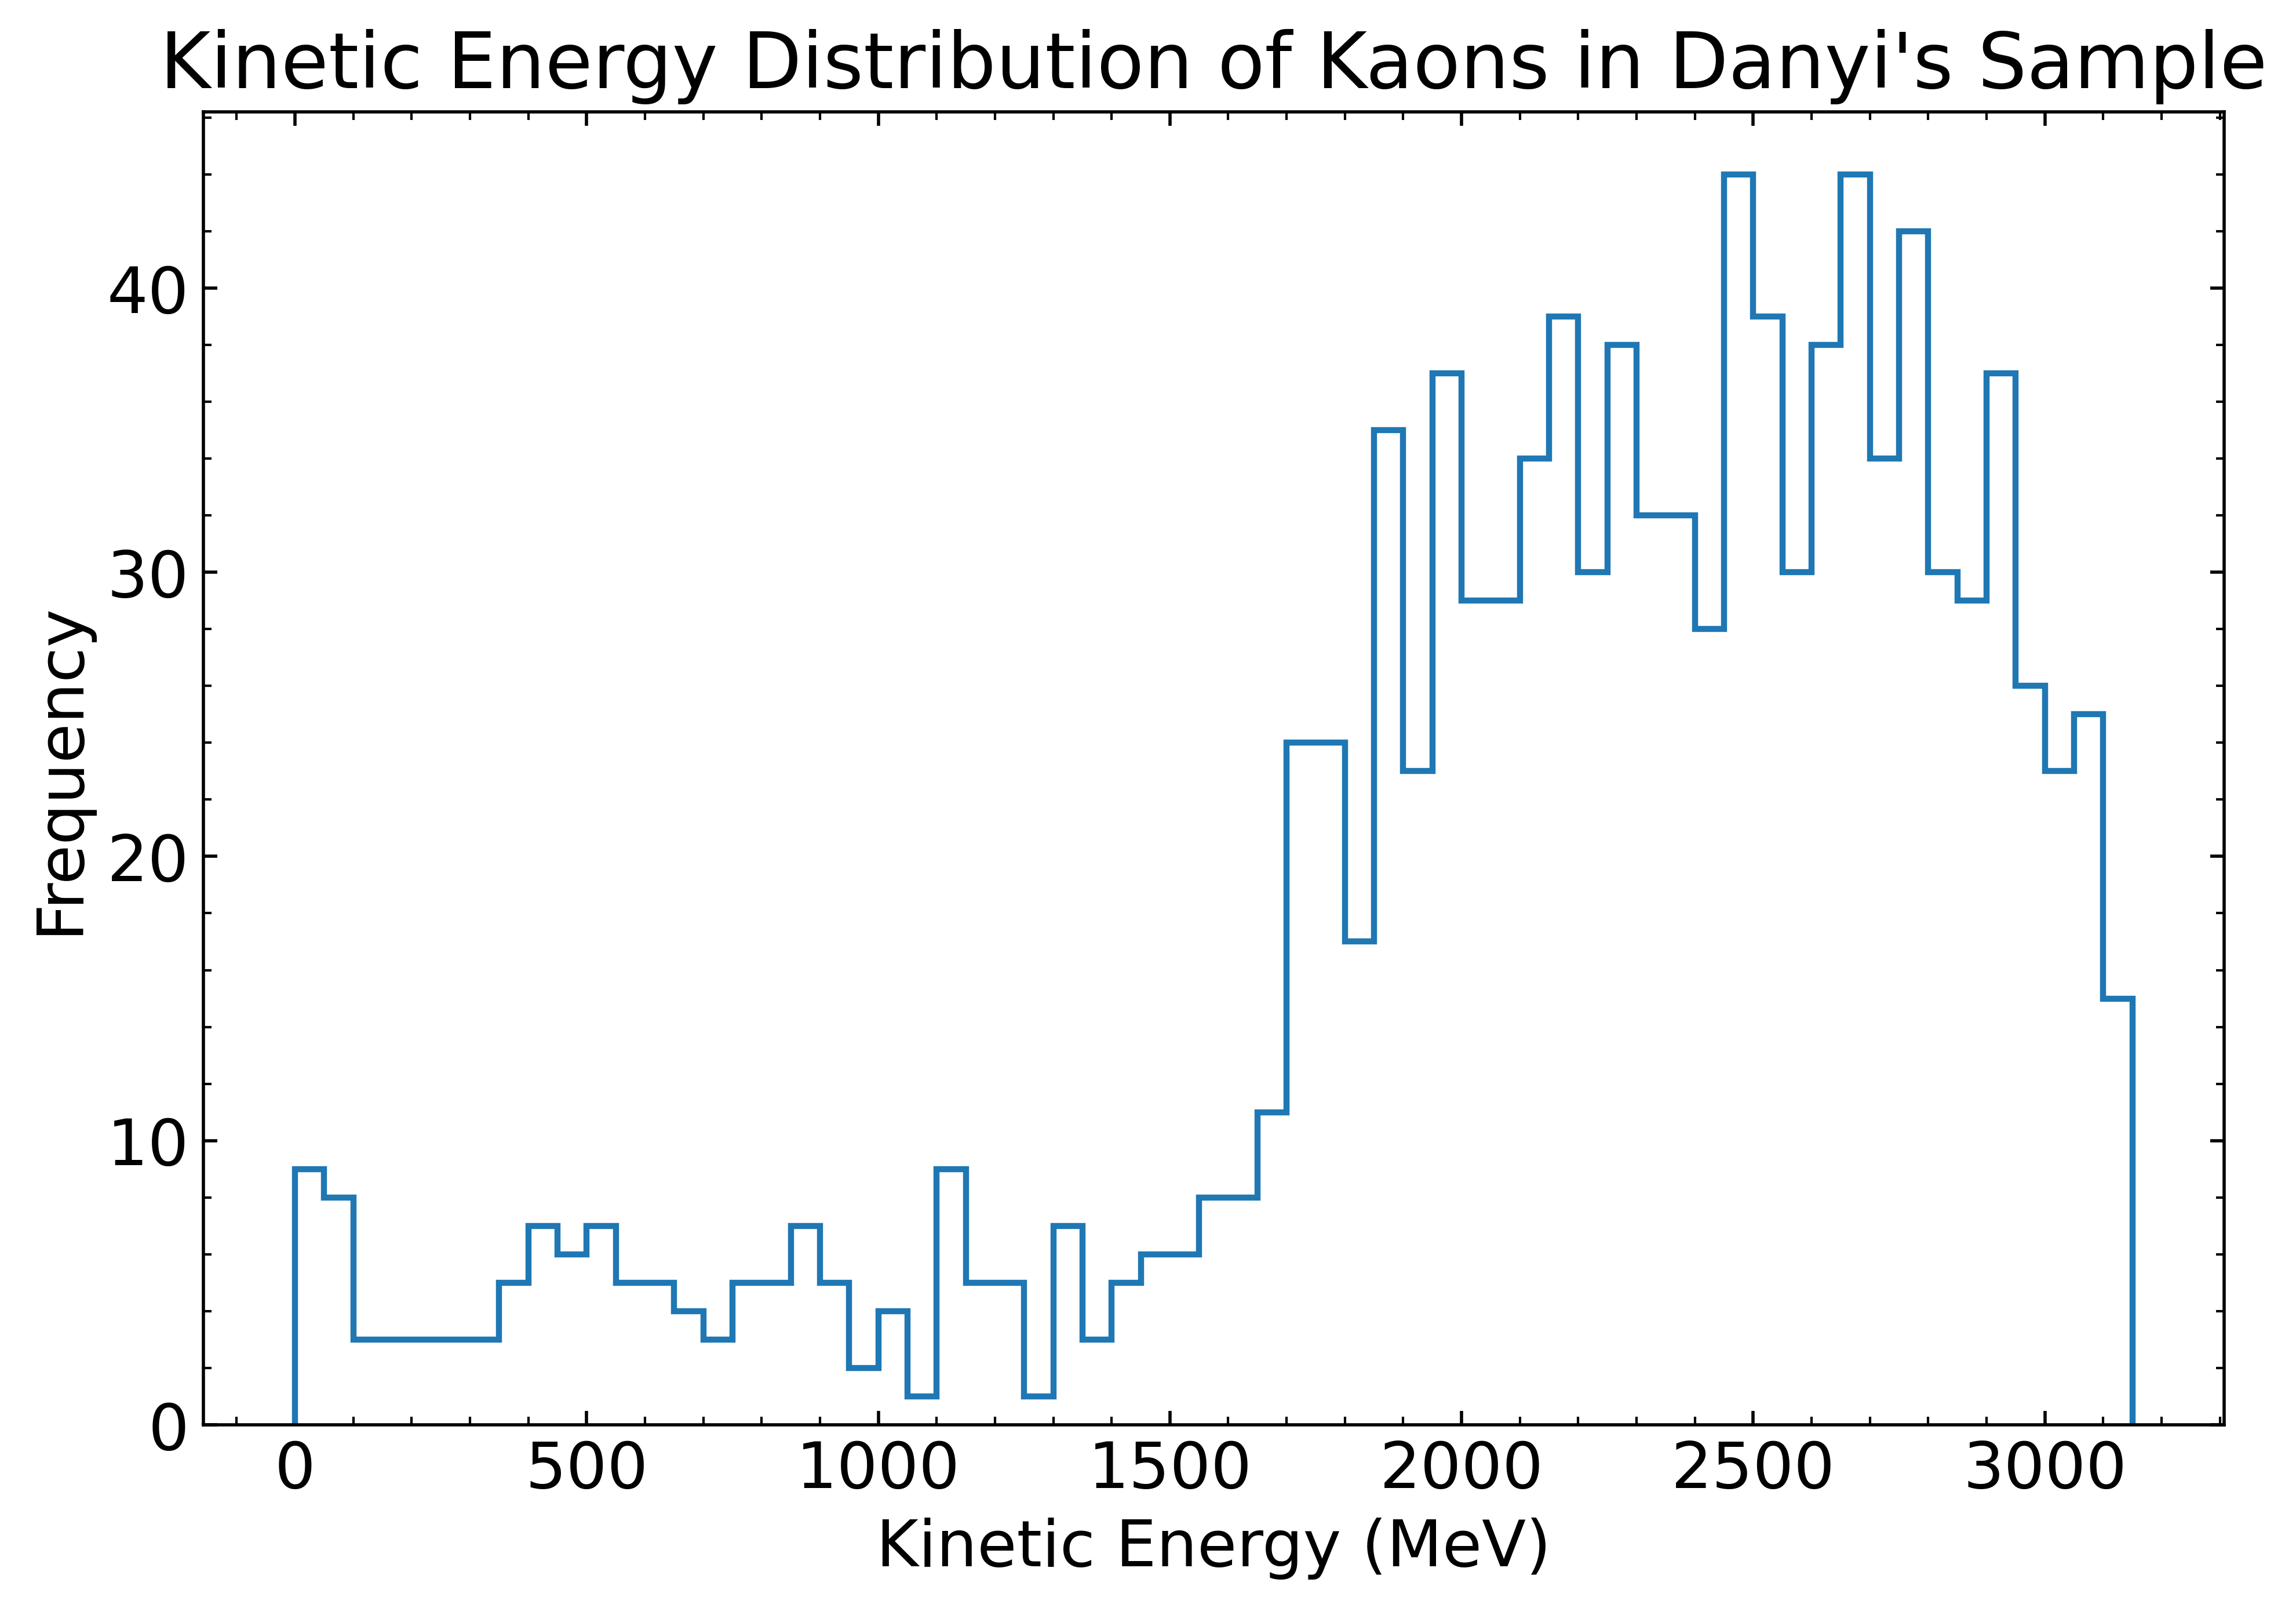

In [36]:
# make plots

# histogram of energies
plt.figure(figsize=(9,6),dpi=500)
plt.hist(KE,bins = np.arange(0,3200,50),histtype='step',linewidth=1.5)
plt.xlabel("Kinetic Energy (MeV)")
plt.ylabel("Frequency")
plt.title("Kinetic Energy Distribution of Kaons in Danyi's Sample")

Text(0.5, 1.0, "Angle Distribution of Kaons in Danyi's Sample")

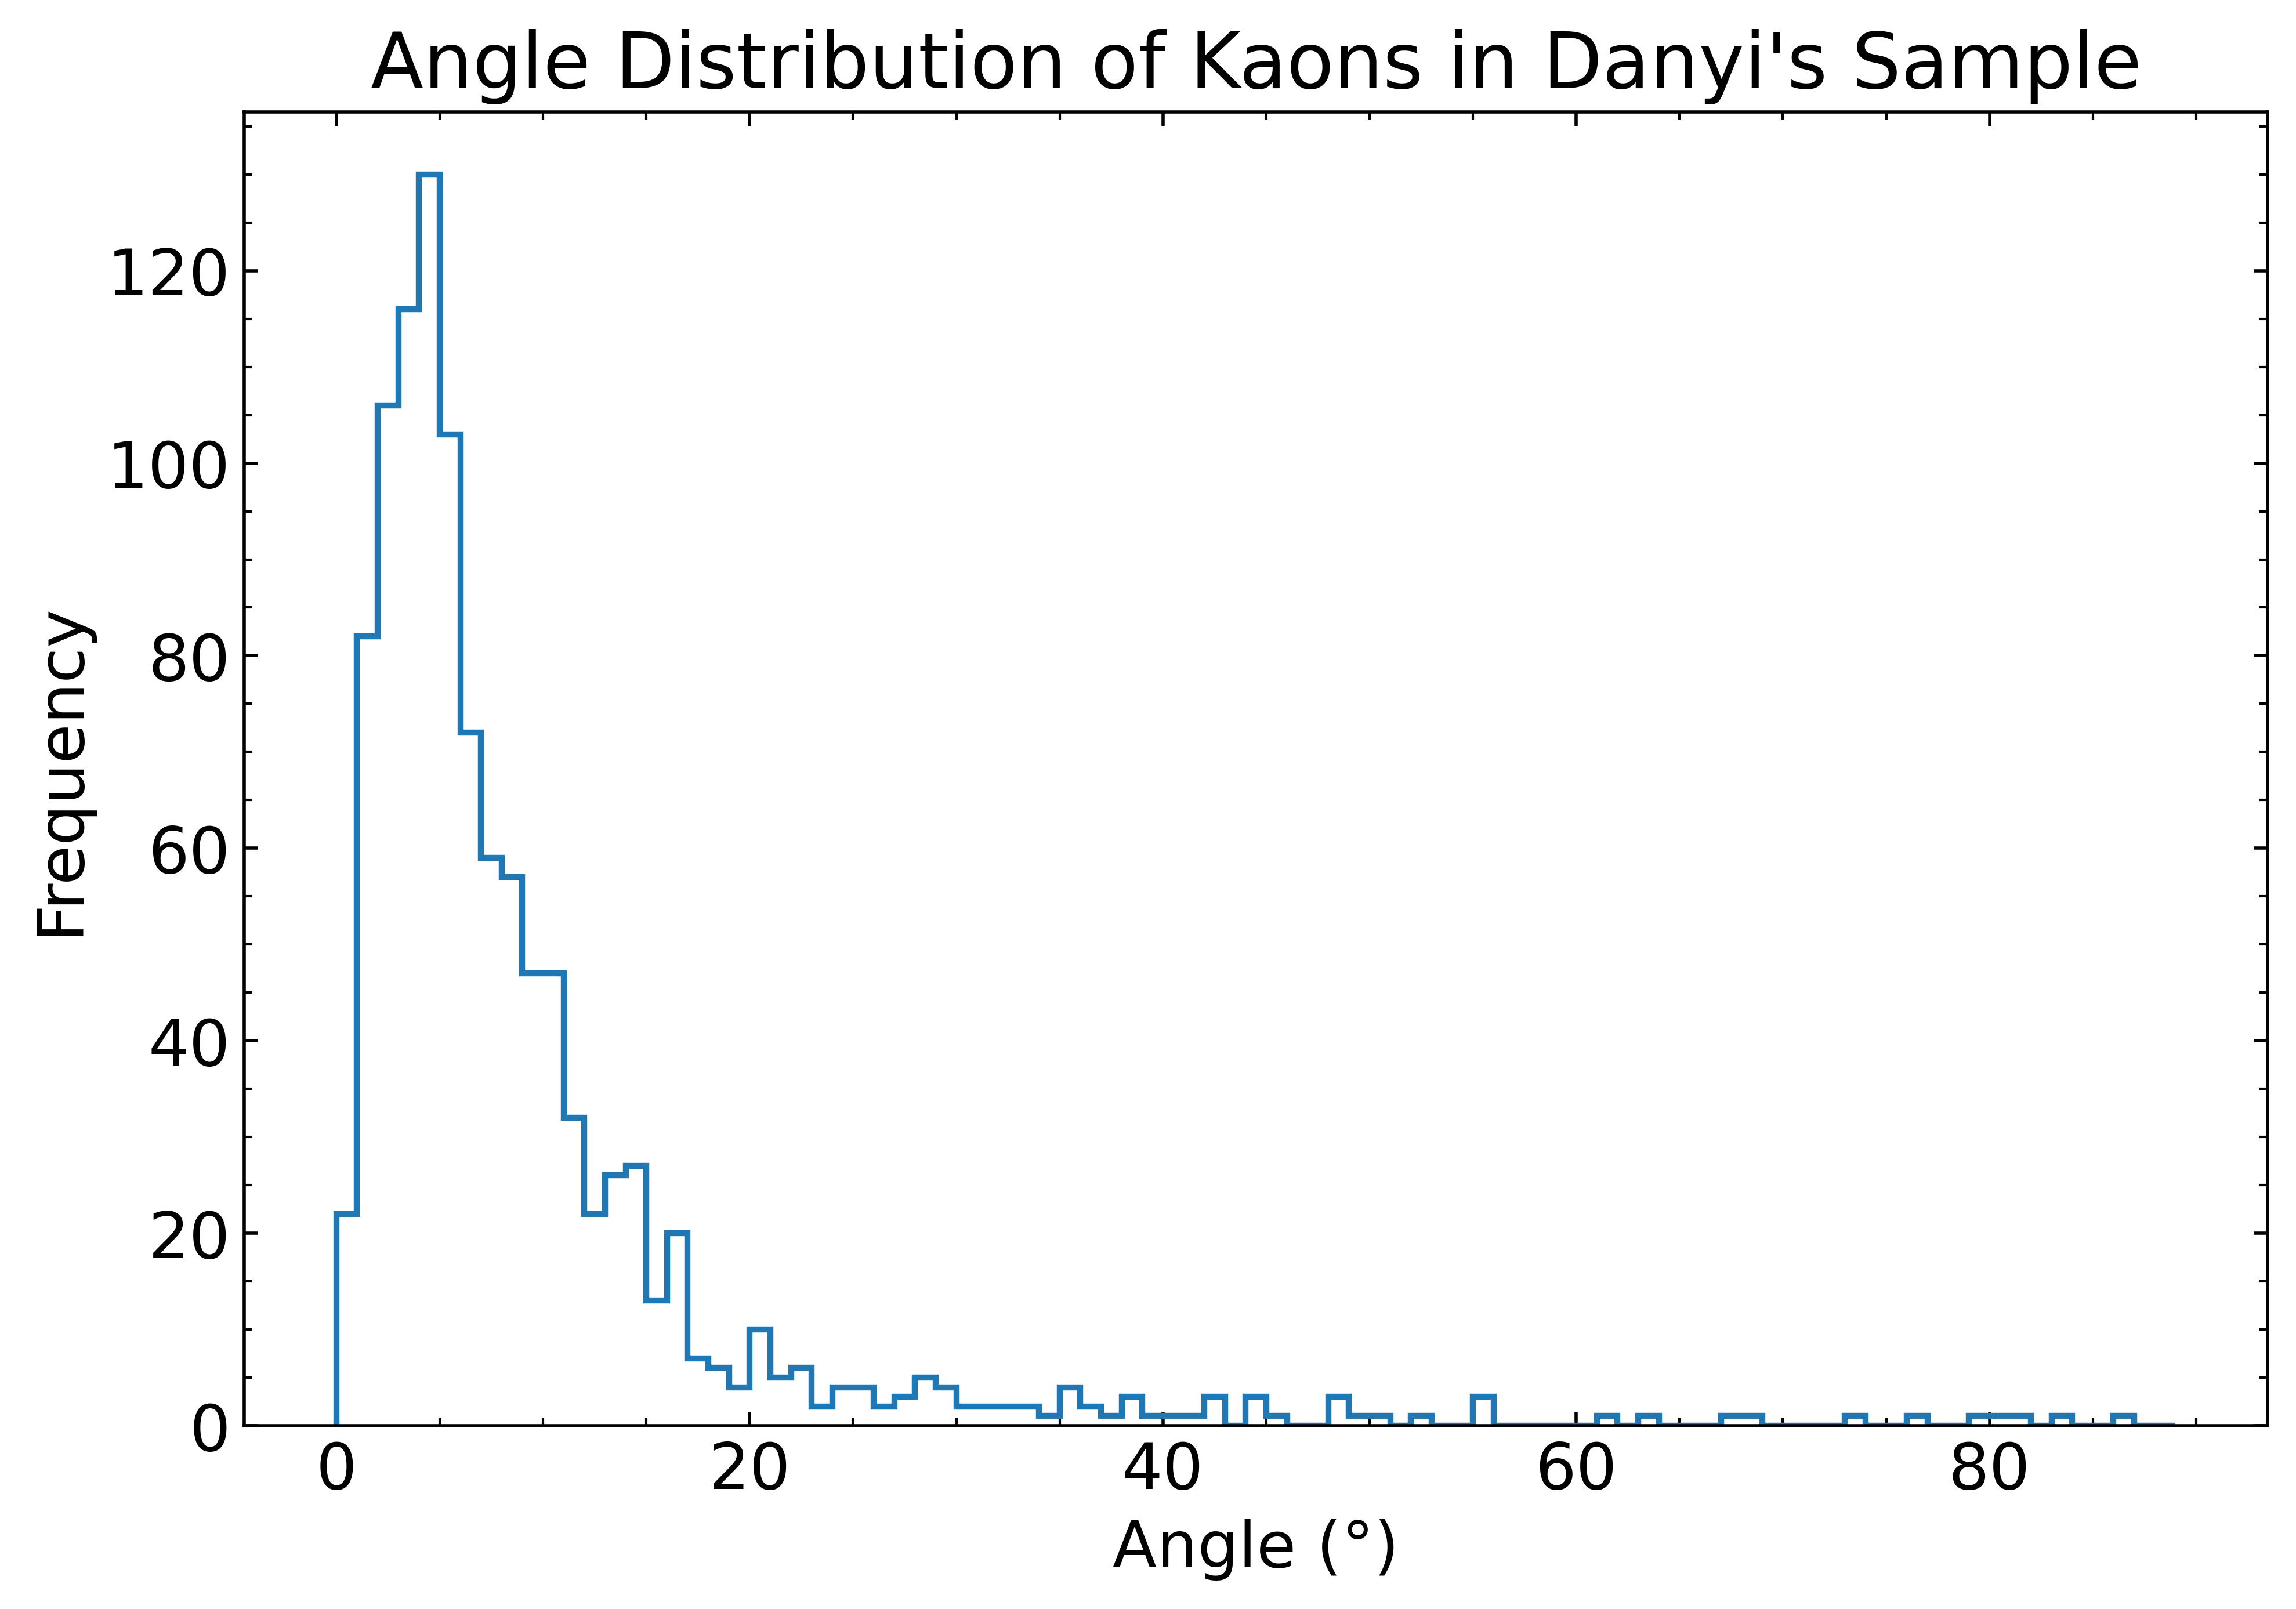

In [49]:
# histogram of angles
plt.figure(figsize=(9,6),dpi=500)
plt.hist(theta,bins = np.arange(0,90,1),histtype='step',linewidth=1.5)
plt.xlabel("Angle (°)")
plt.ylabel("Frequency")
plt.title("Angle Distribution of Kaons in Danyi's Sample")

Text(0.5, 1.0, 'Distribution of Number of Daughters Per Kaon')

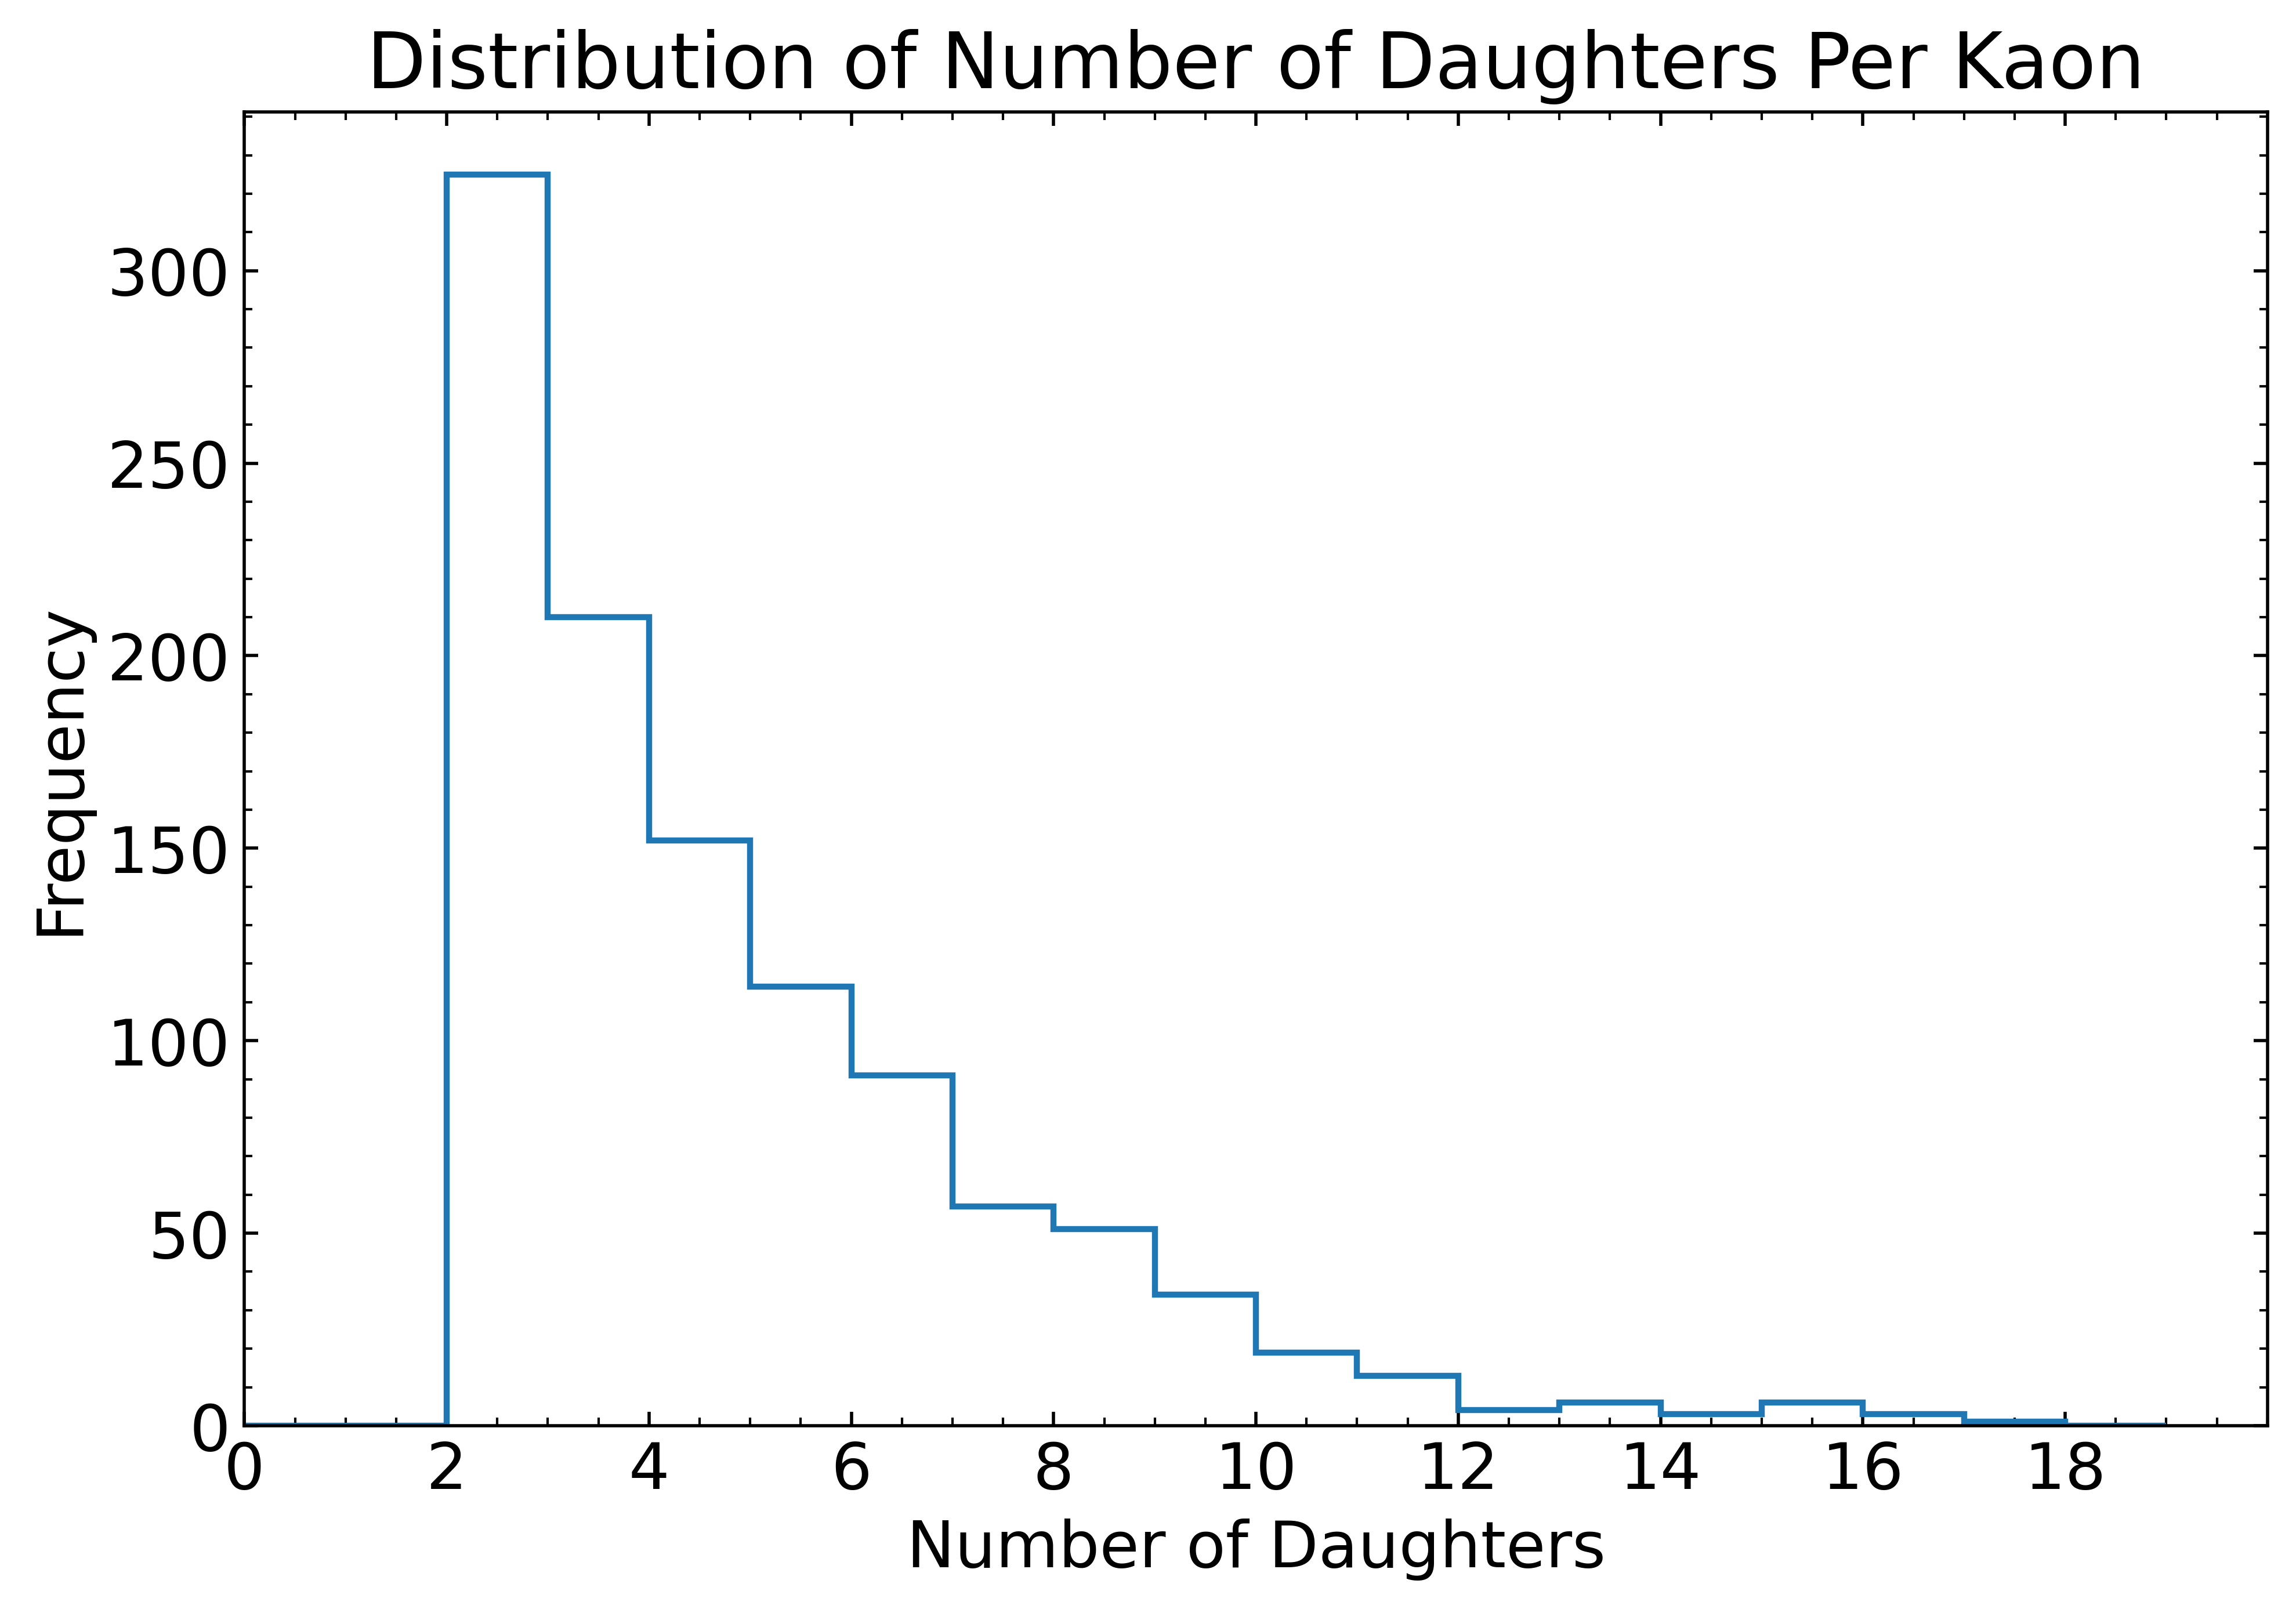

In [117]:
# histogram of number of daughters per event
plt.figure(figsize=(9,6),dpi=500)
plt.hist(numdaughters,bins = np.arange(0,20,1),histtype='step',linewidth=1.5)
plt.xlabel("Number of Daughters")
plt.xlim(0,20)
plt.xticks(np.arange(0,20,2))
plt.ylabel("Frequency")
plt.title("Distribution of Number of Daughters Per Kaon")

(0.0, 500.0)

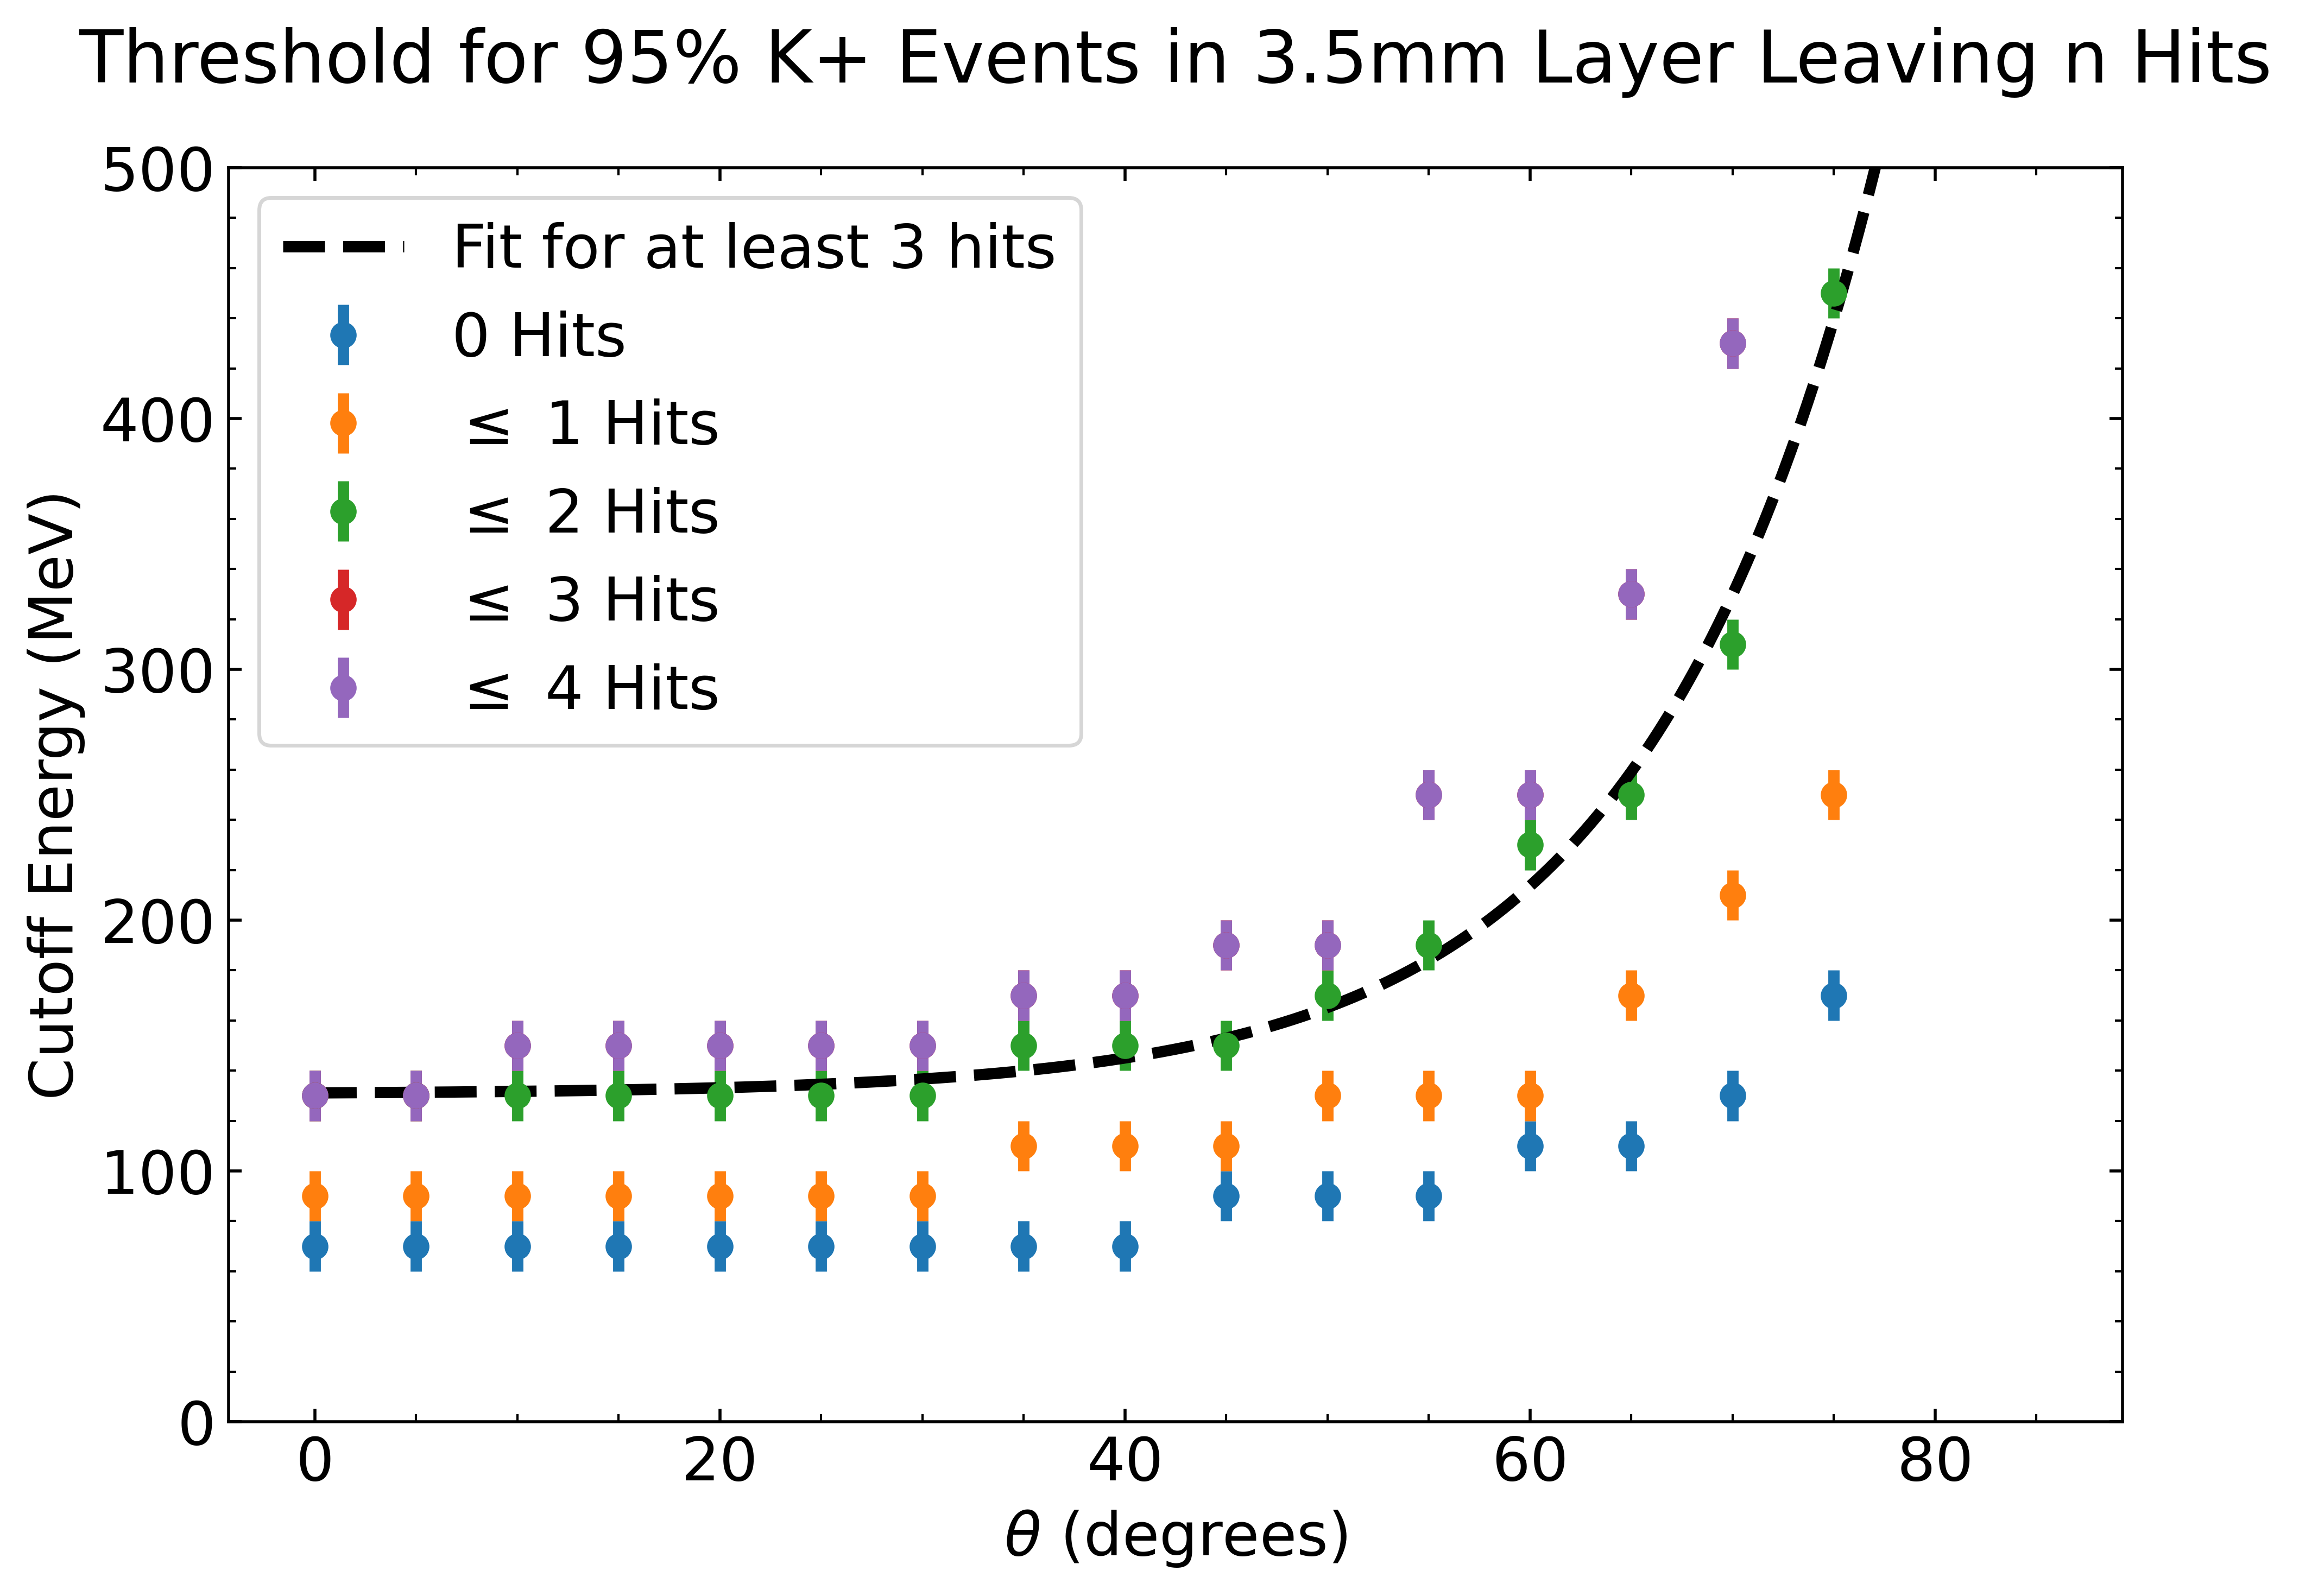

In [4]:
# sort through 19 text files, and find the thresholds for each of them. make a function

def find_threshholds(file,cutoff):
    # import data
    data = np.genfromtxt(file,delimiter=',',dtype=str)
    # first column are names
    name = data[0:,0]
    entries = len(name)
    # energy packed into string
    energy = np.zeros(entries)
    for i in range(len(name)):
        thisname = name[i]
        # clean up shorter entries such as 0.3gev
        try:
            energy[i] = thisname[14:19]
        except ValueError:
            try:
                energy[i] = thisname[14:18]
            except ValueError:
                energy[i] = thisname[14:17]

    # reload data with dtype float
    data = np.genfromtxt(file,delimiter=',',dtype=float)

    f0 = data[0:,1]
    f1 = data[0:,2]
    f2 = data[0:,3]
    f3 = data[0:,4]
    f4 = data[0:,4]
    
    f0thresh = -1 # bad answer, use as error protection
    f1thresh = -1
    f2thresh = -1
    f3thresh = -1
    f4thresh = -1
    
    cutoff
    for i in range(entries):
        if f0[i] < cutoff:
            f0thresh = energy[i]
            break

    for i in range(entries):
        if f1[i] < cutoff:
            f1thresh = energy[i]
            break

    for i in range(entries):
        if f2[i] < cutoff:
            f2thresh = energy[i]
            break

    for i in range(entries):
        if f3[i] < cutoff:
            f3thresh = energy[i]
            break
            
    for i in range(entries):
        if f4[i] < cutoff:
            f4thresh = energy[i]
            break    
    
    return (f0thresh, f1thresh, f2thresh, f3thresh, f4thresh)

thetas = np.arange(0,80,5)

# list of thresholds @ all angles for 20% confidence level.
f0s_20 = []
f1s_20 = []
f2s_20 = []
f3s_20 = []
f4s_20 = []

# list of thresholds @ all angles for 10% confidence level.
f0s_10 = []
f1s_10 = []
f2s_10 = []
f3s_10 = []
f4s_10 = []

# list of thresholds @ all angles for 5% confidence level.
f0s_5 = []
f1s_5 = []
f2s_5 = []
f3s_5 = []
f4s_5 = []

# list of thresholds @ all angles for 5% confidence level.
f0s_2 = []
f1s_2 = []
f2s_2 = []
f3s_2 = []
f4s_2 = []

error = [10] * len(thetas) # from spacing between energies in the sample.

for i in range(len(thetas)):
    extension = str(thetas[i]) + "_numhits.txt"
    filename = '/Users/chris/Desktop/ldmx/ldmx_files/cutoffs_radians/' + extension
    t0, t1, t2, t3, t4 = find_threshholds(filename,0.1)
    f0s_10.append(t0)
    f1s_10.append(t1)
    f2s_10.append(t2)
    f3s_10.append(t3)
    f4s_10.append(t4)
    
    t0, t1, t2, t3, t4 = find_threshholds(filename,0.2)
    f0s_20.append(t0)
    f1s_20.append(t1)
    f2s_20.append(t2)
    f3s_20.append(t3)
    f4s_20.append(t4)
    
    t0, t1, t2, t3, t4 = find_threshholds(filename,0.05)
    f0s_5.append(t0*1000)
    f1s_5.append(t1*1000)
    f2s_5.append(t2*1000)
    f3s_5.append(t3*1000)
    f4s_5.append(t4*1000)
    
    t0, t1, t2, t3, t4 = find_threshholds(filename,0.05)
    f0s_2.append(t0)
    f1s_2.append(t1)
    f2s_2.append(t2)
    f3s_2.append(t3)
    f4s_2.append(t4)
    
def exp(x,A,b,h):
    return A*np.exp(b*x)+h

p0 = [0.6,0.08,100]
par, cov = curve_fit(exp,thetas,f2s_5,p0=p0,absolute_sigma=True)
par2, cov2 = curve_fit(exp,thetas,f1s_5,p0=p0,absolute_sigma=True)


# make plot for 5% confidence level




# make plot for 5% confidence level
plt.figure(figsize=(9,6),dpi=500)

plt.errorbar(thetas,f0s_5,yerr=error,linestyle='',marker='o',label="0 Hits")
plt.errorbar(thetas,f1s_5,yerr=error,linestyle='',marker='o',label=r'$\leq$ 1 Hits')
plt.errorbar(thetas,f2s_5,yerr=error,linestyle='',marker='o',label=r'$\leq$ 2 Hits')
plt.errorbar(thetas,f3s_5,yerr=error,linestyle='',marker='o',label=r'$\leq$ 3 Hits')
plt.errorbar(thetas,f4s_5,yerr=error,linestyle='',marker='o',label=r'$\leq$ 4 Hits')

# plot fit
xvals = np.linspace(0,85,1000)
yvals = exp(xvals,par[0],par[1],par[2])
yvals2 = exp(xvals,par2[0],par2[1],par2[2])
plt.plot(xvals,yvals,label="Fit for at least 3 hits",linestyle='--',color='black')

plt.xlabel(r"$\theta$ (degrees)")
plt.ylabel("Cutoff Energy (MeV)")
plt.title("Threshold for 95% K+ Events in 3.5mm Layer Leaving n Hits",y=1.05)
plt.legend(loc='upper left')
plt.ylim(0,500)

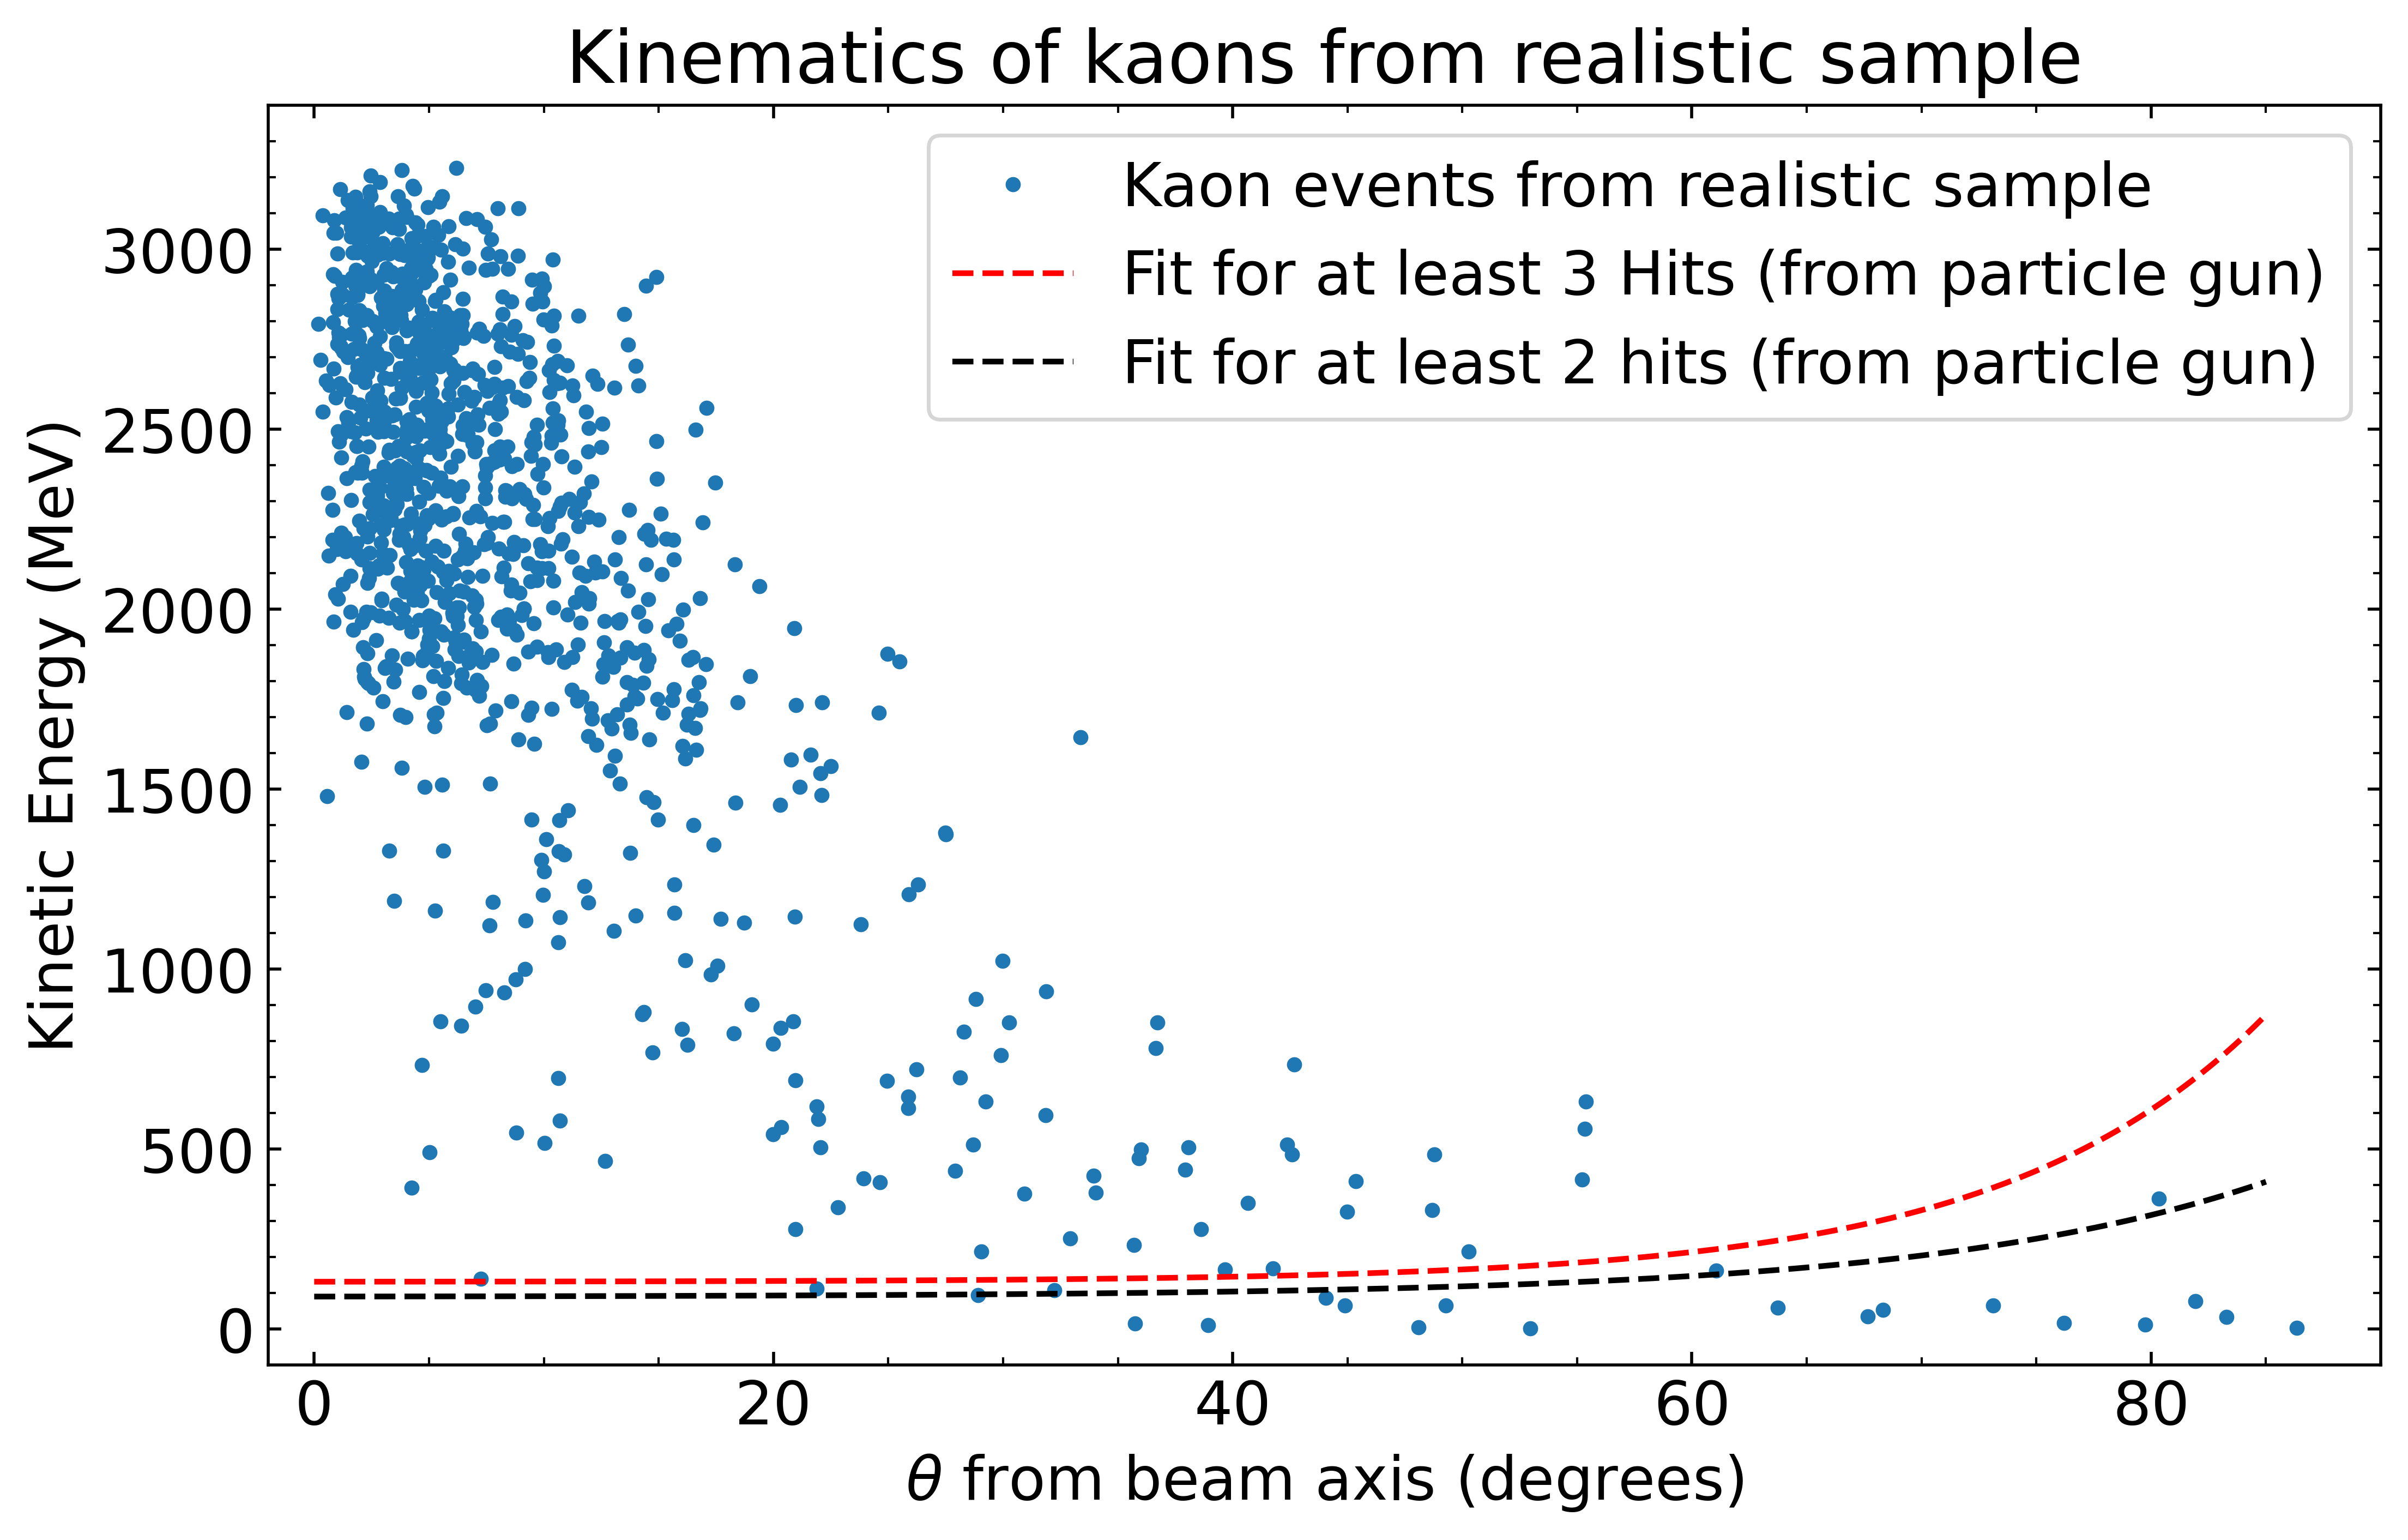

In [18]:
# Scatter plot comparing angle and energy

plt.figure(figsize=(10,6),dpi=500)
plt.plot(theta,KE,'.',label='Kaon events from realistic sample')
plt.xlabel(r"$\theta$ from beam axis (degrees)")
plt.ylabel("Kinetic Energy (MeV)")
plt.title("Kinematics of kaons from realistic sample")
plt.vlines(200,0,40,linestyle='dashed',color='red',linewidth=2)
plt.plot([200,200,3400],[40,60,60],linestyle='dashed',color='red',linewidth=2)
plt.ylim(-100,3400)
plt.xlim(-2,90)

# plot fit
plt.plot(xvals,yvals,label=r"Fit for at least 3 Hits (from particle gun)",linestyle='--',linewidth='1.5',color='red')
plt.plot(xvals,yvals2,linestyle='--',color='black',linewidth='1.5',label="Fit for at least 2 hits (from particle gun)")

plt.legend()

(240.0, 300.0)

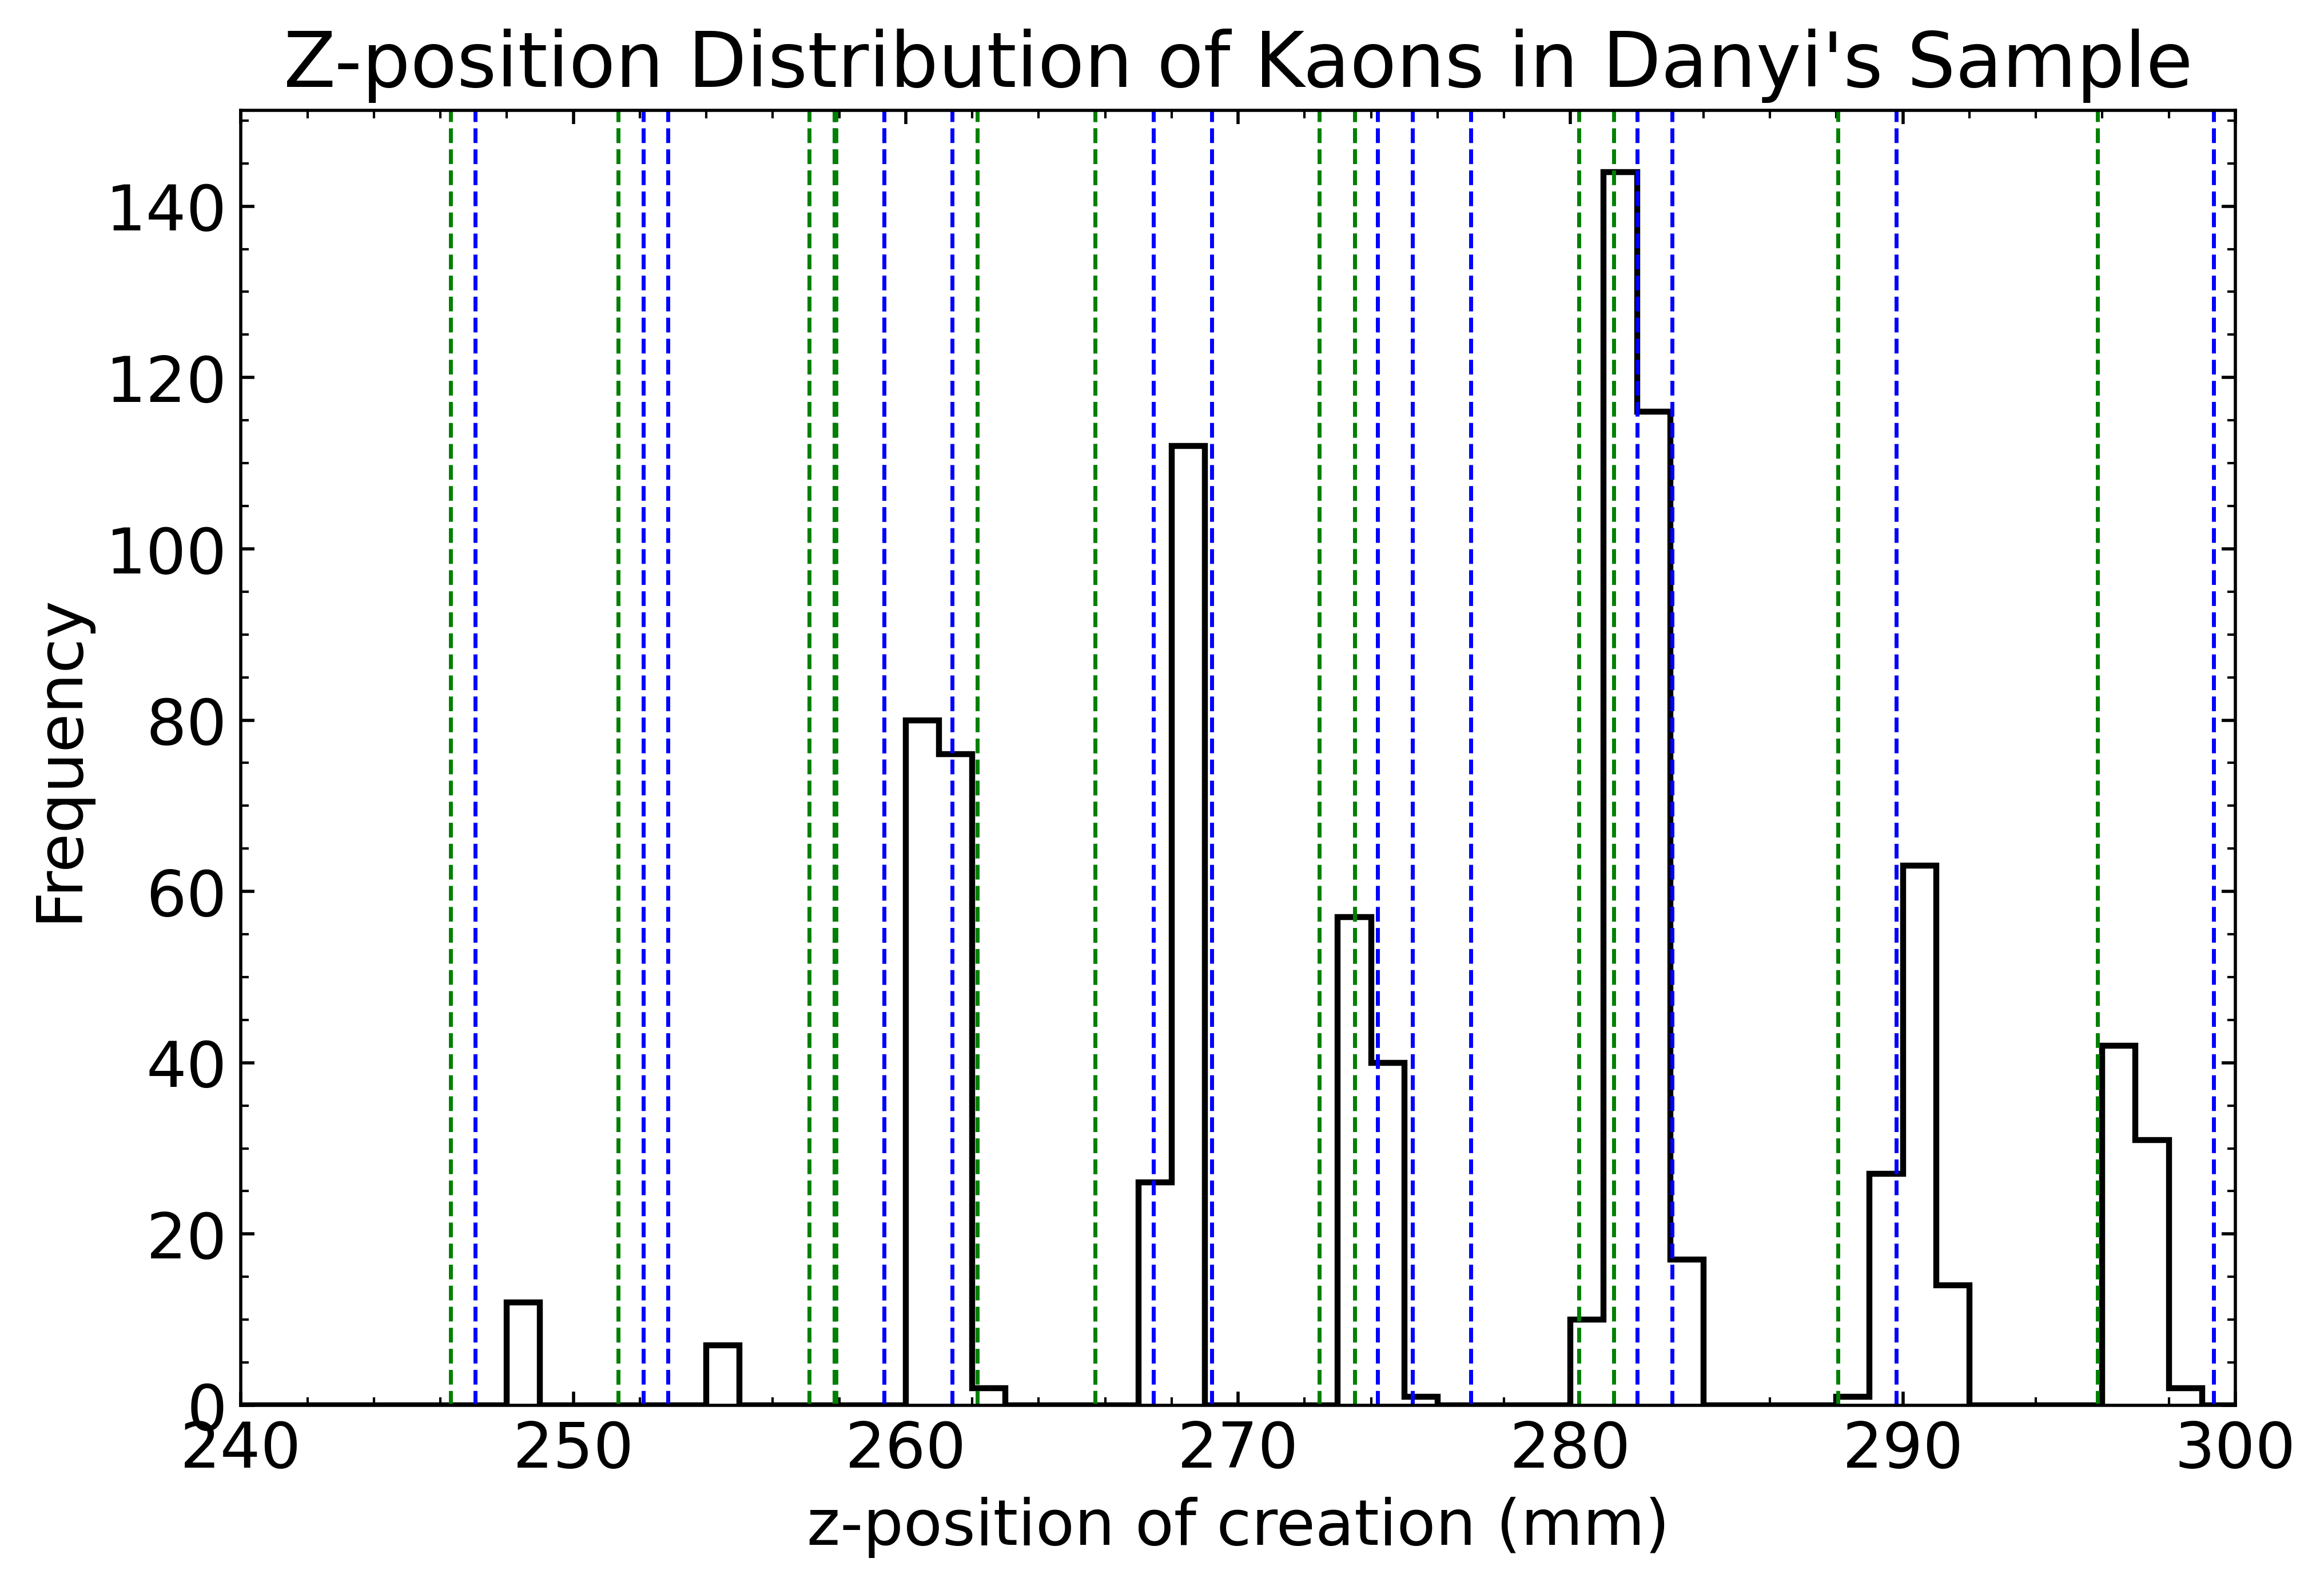

In [24]:
# histogram of energies
plt.figure(figsize=(9,6),dpi=500)
for i in range(len(tungsten)):
    #plt.axvline(layers[i],linestyle='dashed',linewidth='1',color='black')
    plt.axvline(tungsten[i],linestyle='dashed',linewidth='1',color='green')
plt.hist(z,bins = np.arange(230,380,1),histtype='step',linewidth=1.5)
plt.xlabel("z-position of creation (mm)")
plt.ylabel("Frequency")
plt.title("Z-position Distribution of Kaons in Danyi's Sample")

(-20.0, 3400.0)

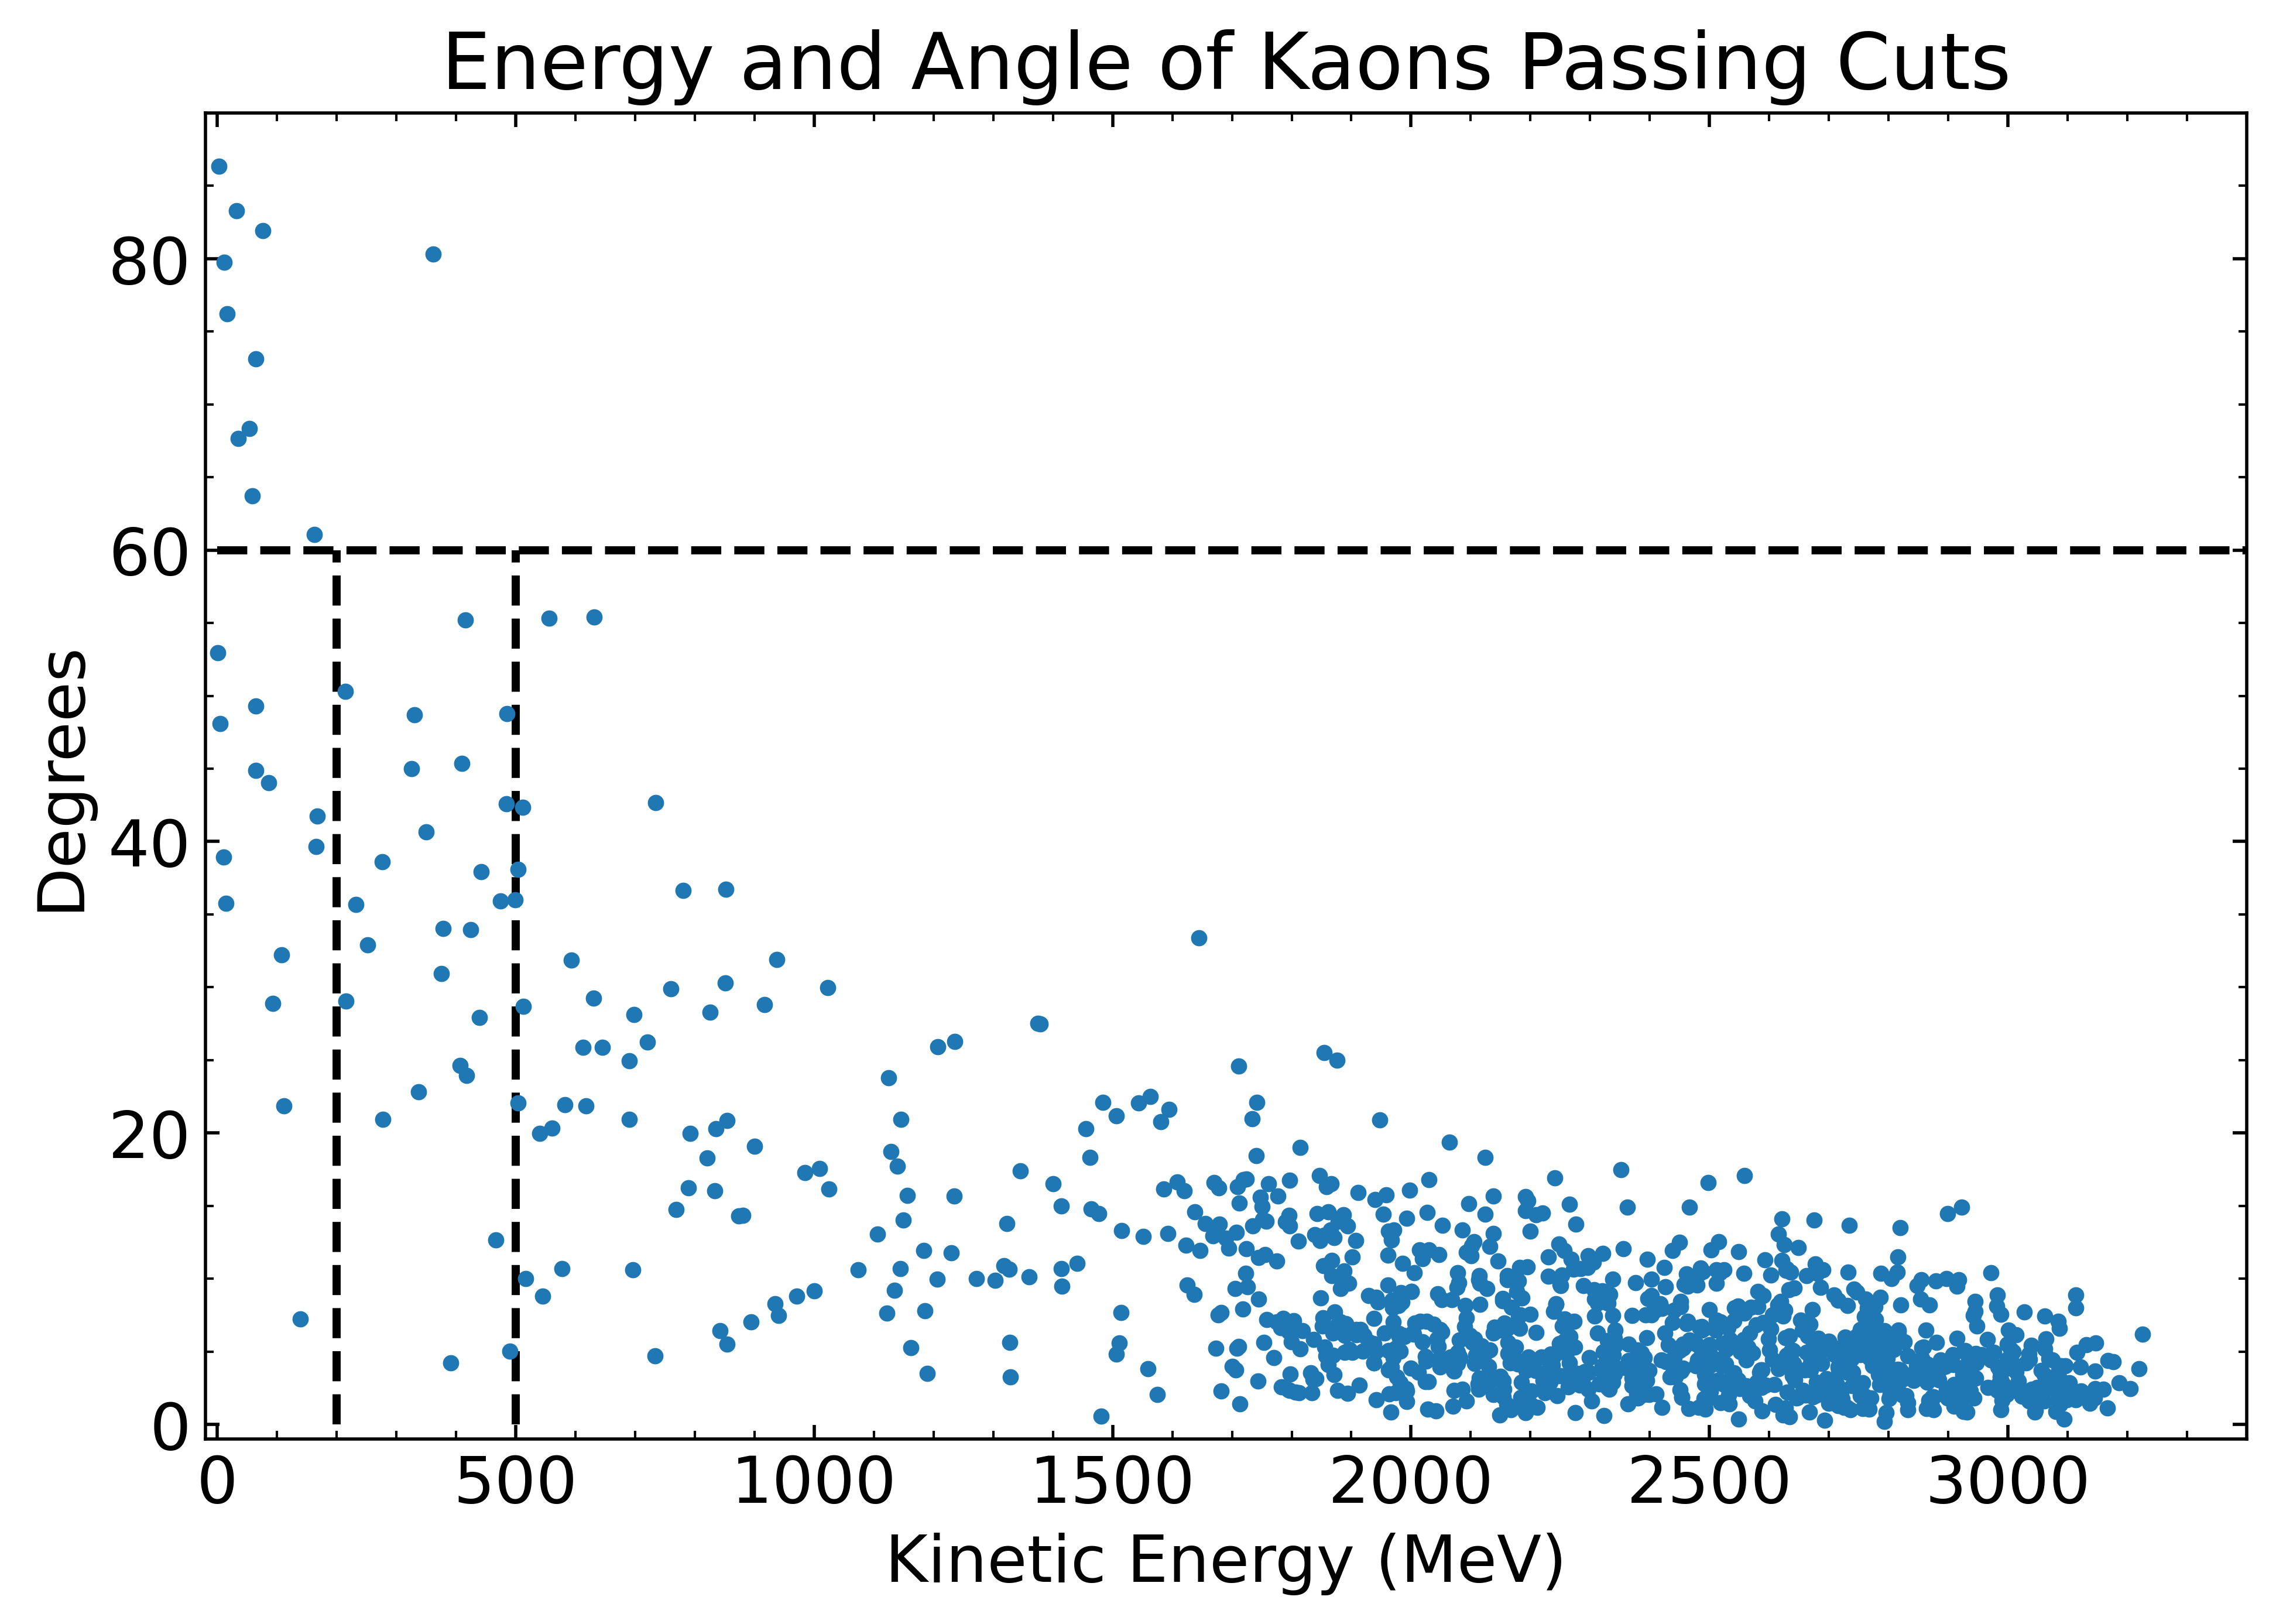

In [100]:
# Scatter plot comparing angle and energy

plt.figure(figsize=(9,6),dpi=500)
plt.plot(KE,theta,'.')
plt.xlabel("Kinetic Energy (MeV)")
plt.ylabel("Degrees")
plt.title("Energy and Angle of Kaons Passing Cuts")
plt.vlines(200,0,60,linestyle='dashed',color='black',linewidth=2)
plt.vlines(500,0,60,linestyle='dashed',color='black',linewidth=2)
plt.plot([0,3400],[60,60],linestyle='dashed',color='black',linewidth=2)
plt.ylim(-1,90)
plt.xlim(-20,3400)

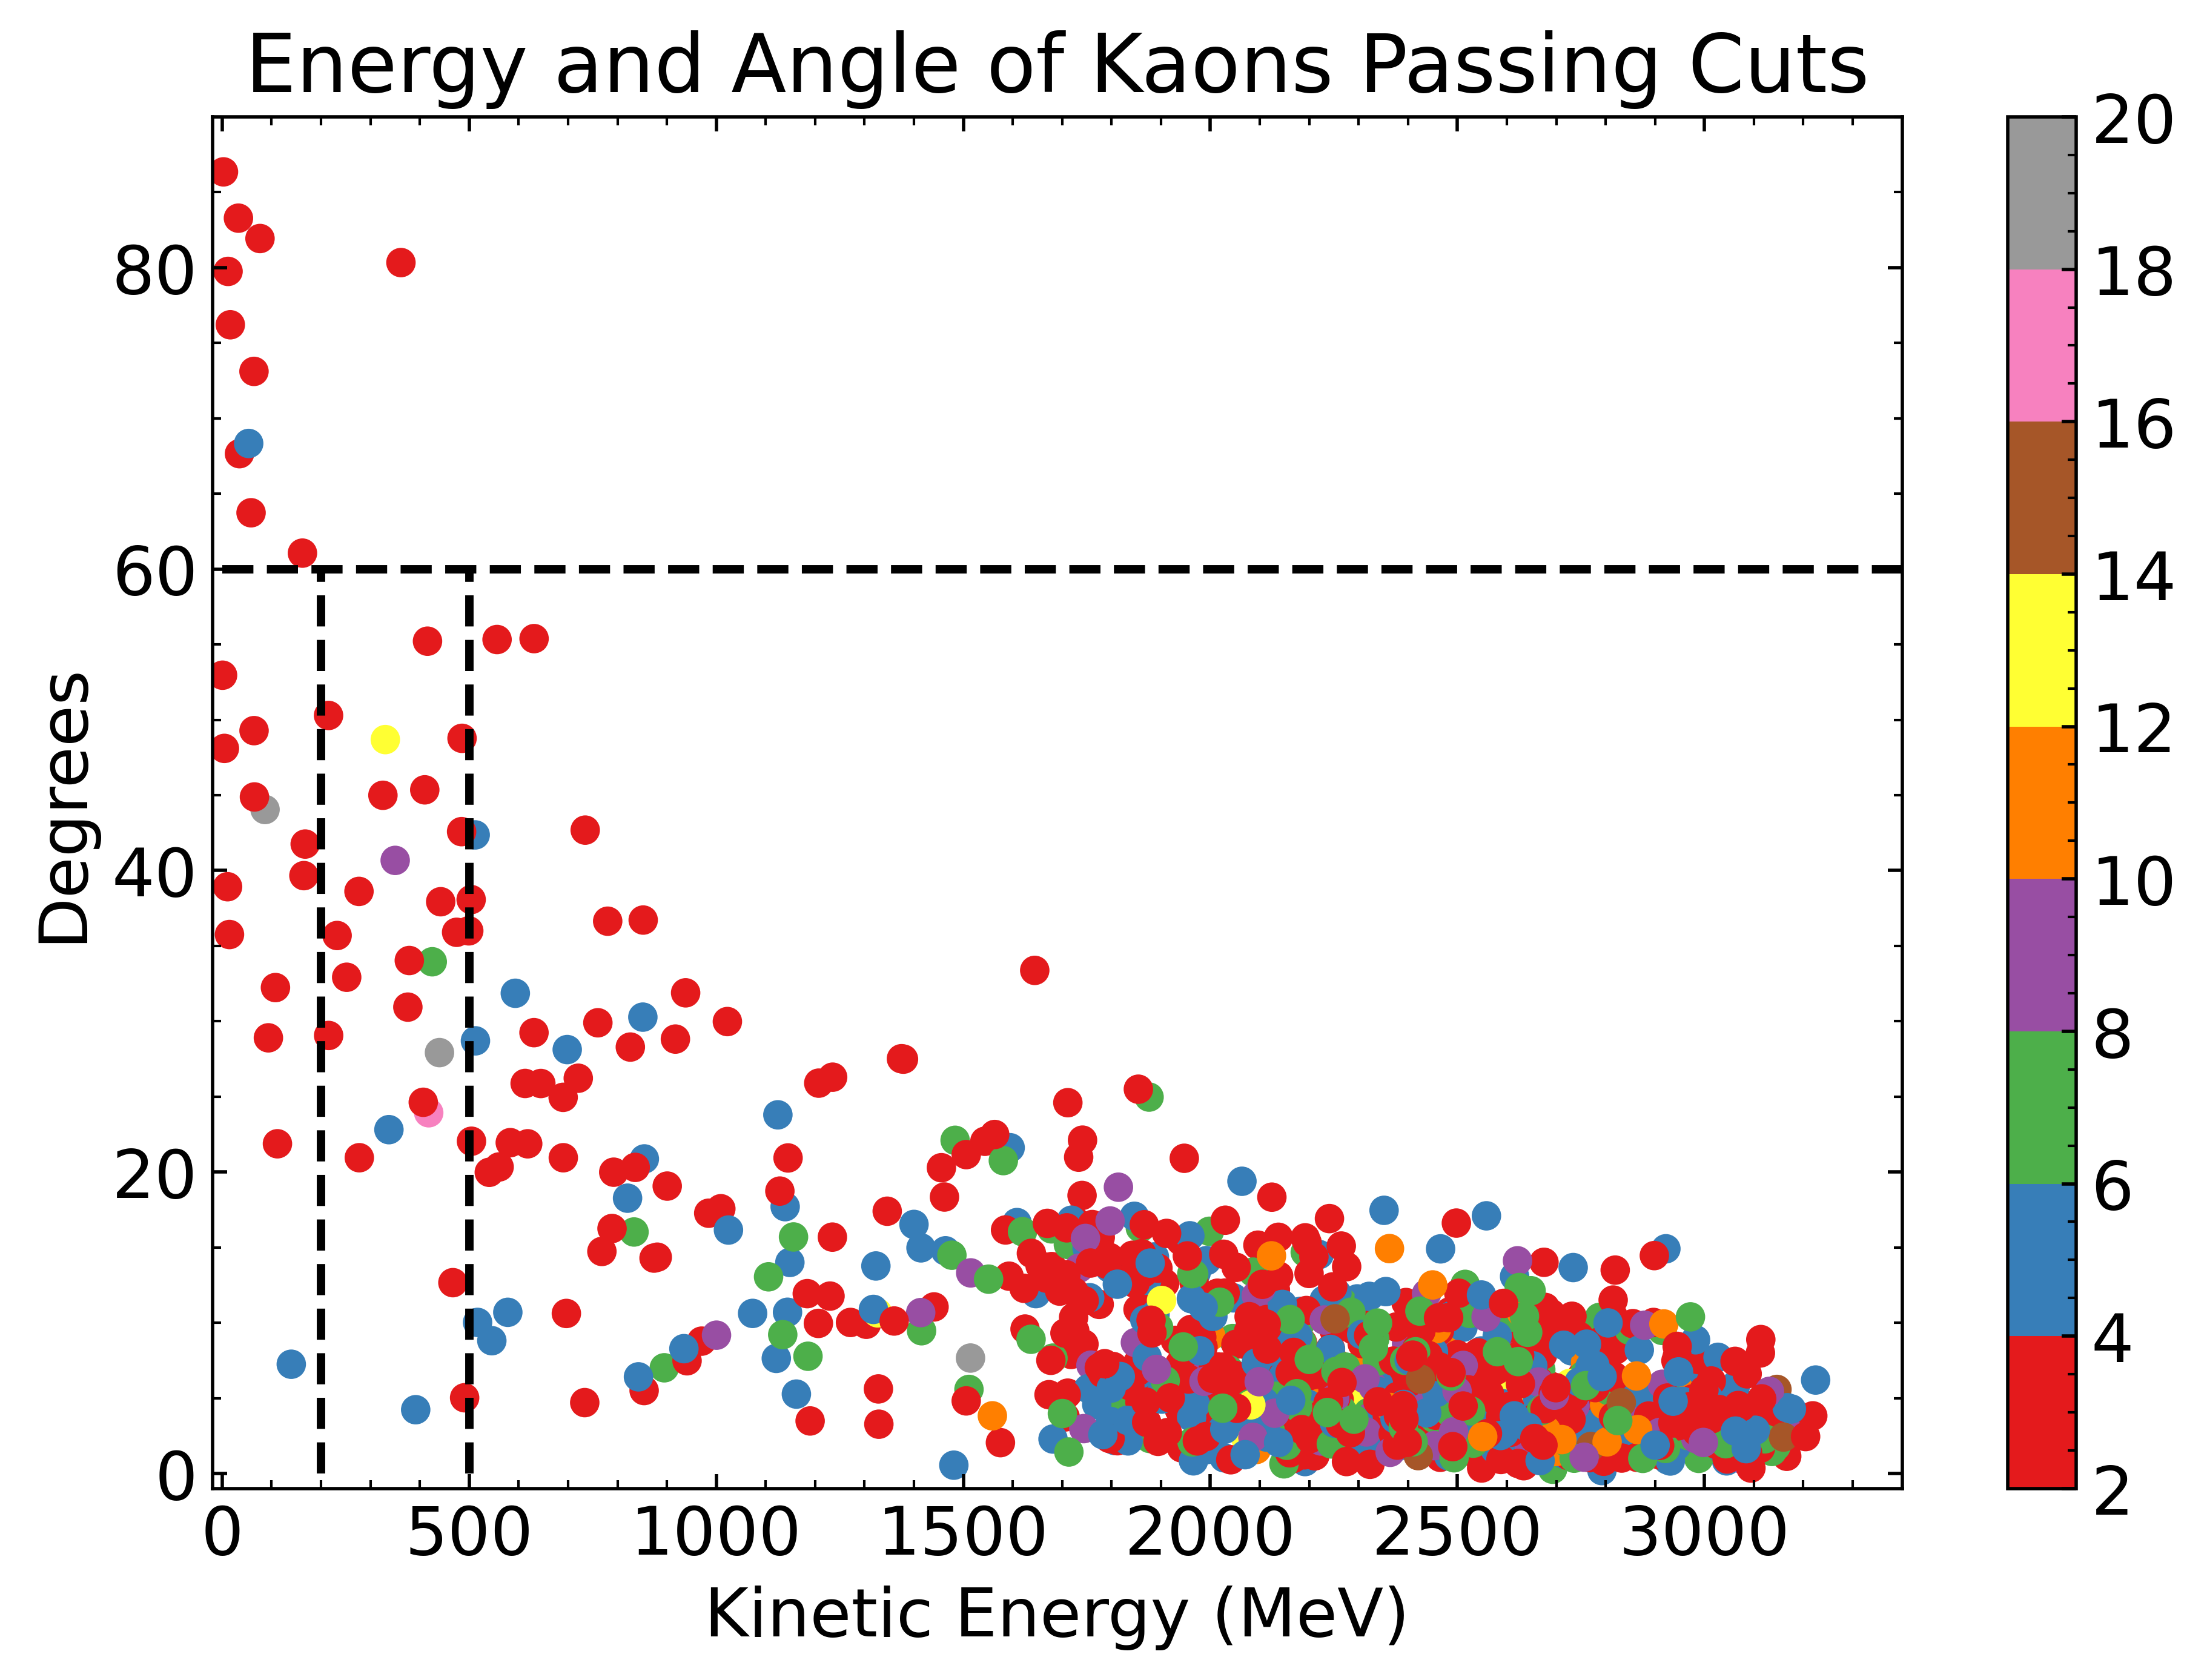

In [140]:
# Scatter plot comparing angle and energy

for i in range(len(numdaughters)):
    if numdaughters[i] > 20:
        numdaughters[i] = 20

plt.figure(figsize=(9,6),dpi=500)
plt.scatter(KE,theta,c=numdaughters,cmap='Set1')
plt.xlabel("Kinetic Energy (MeV)")
plt.ylabel("Degrees")
plt.title("Energy and Angle of Kaons Passing Cuts")
plt.vlines(200,0,60,linestyle='dashed',color='black',linewidth=2)
plt.vlines(500,0,60,linestyle='dashed',color='black',linewidth=2)
plt.plot([0,3400],[60,60],linestyle='dashed',color='black',linewidth=2)
plt.ylim(-1,90)
plt.xlim(-20,3400)
plt.colorbar()

preshower len + aves: 19.00 2294.17, 7.27
a len + aves: 394.00 2211.64, 8.81
b len + aves: 467.00 2167.09, 9.46
c len + aves: 212.00 2174.52, 9.25


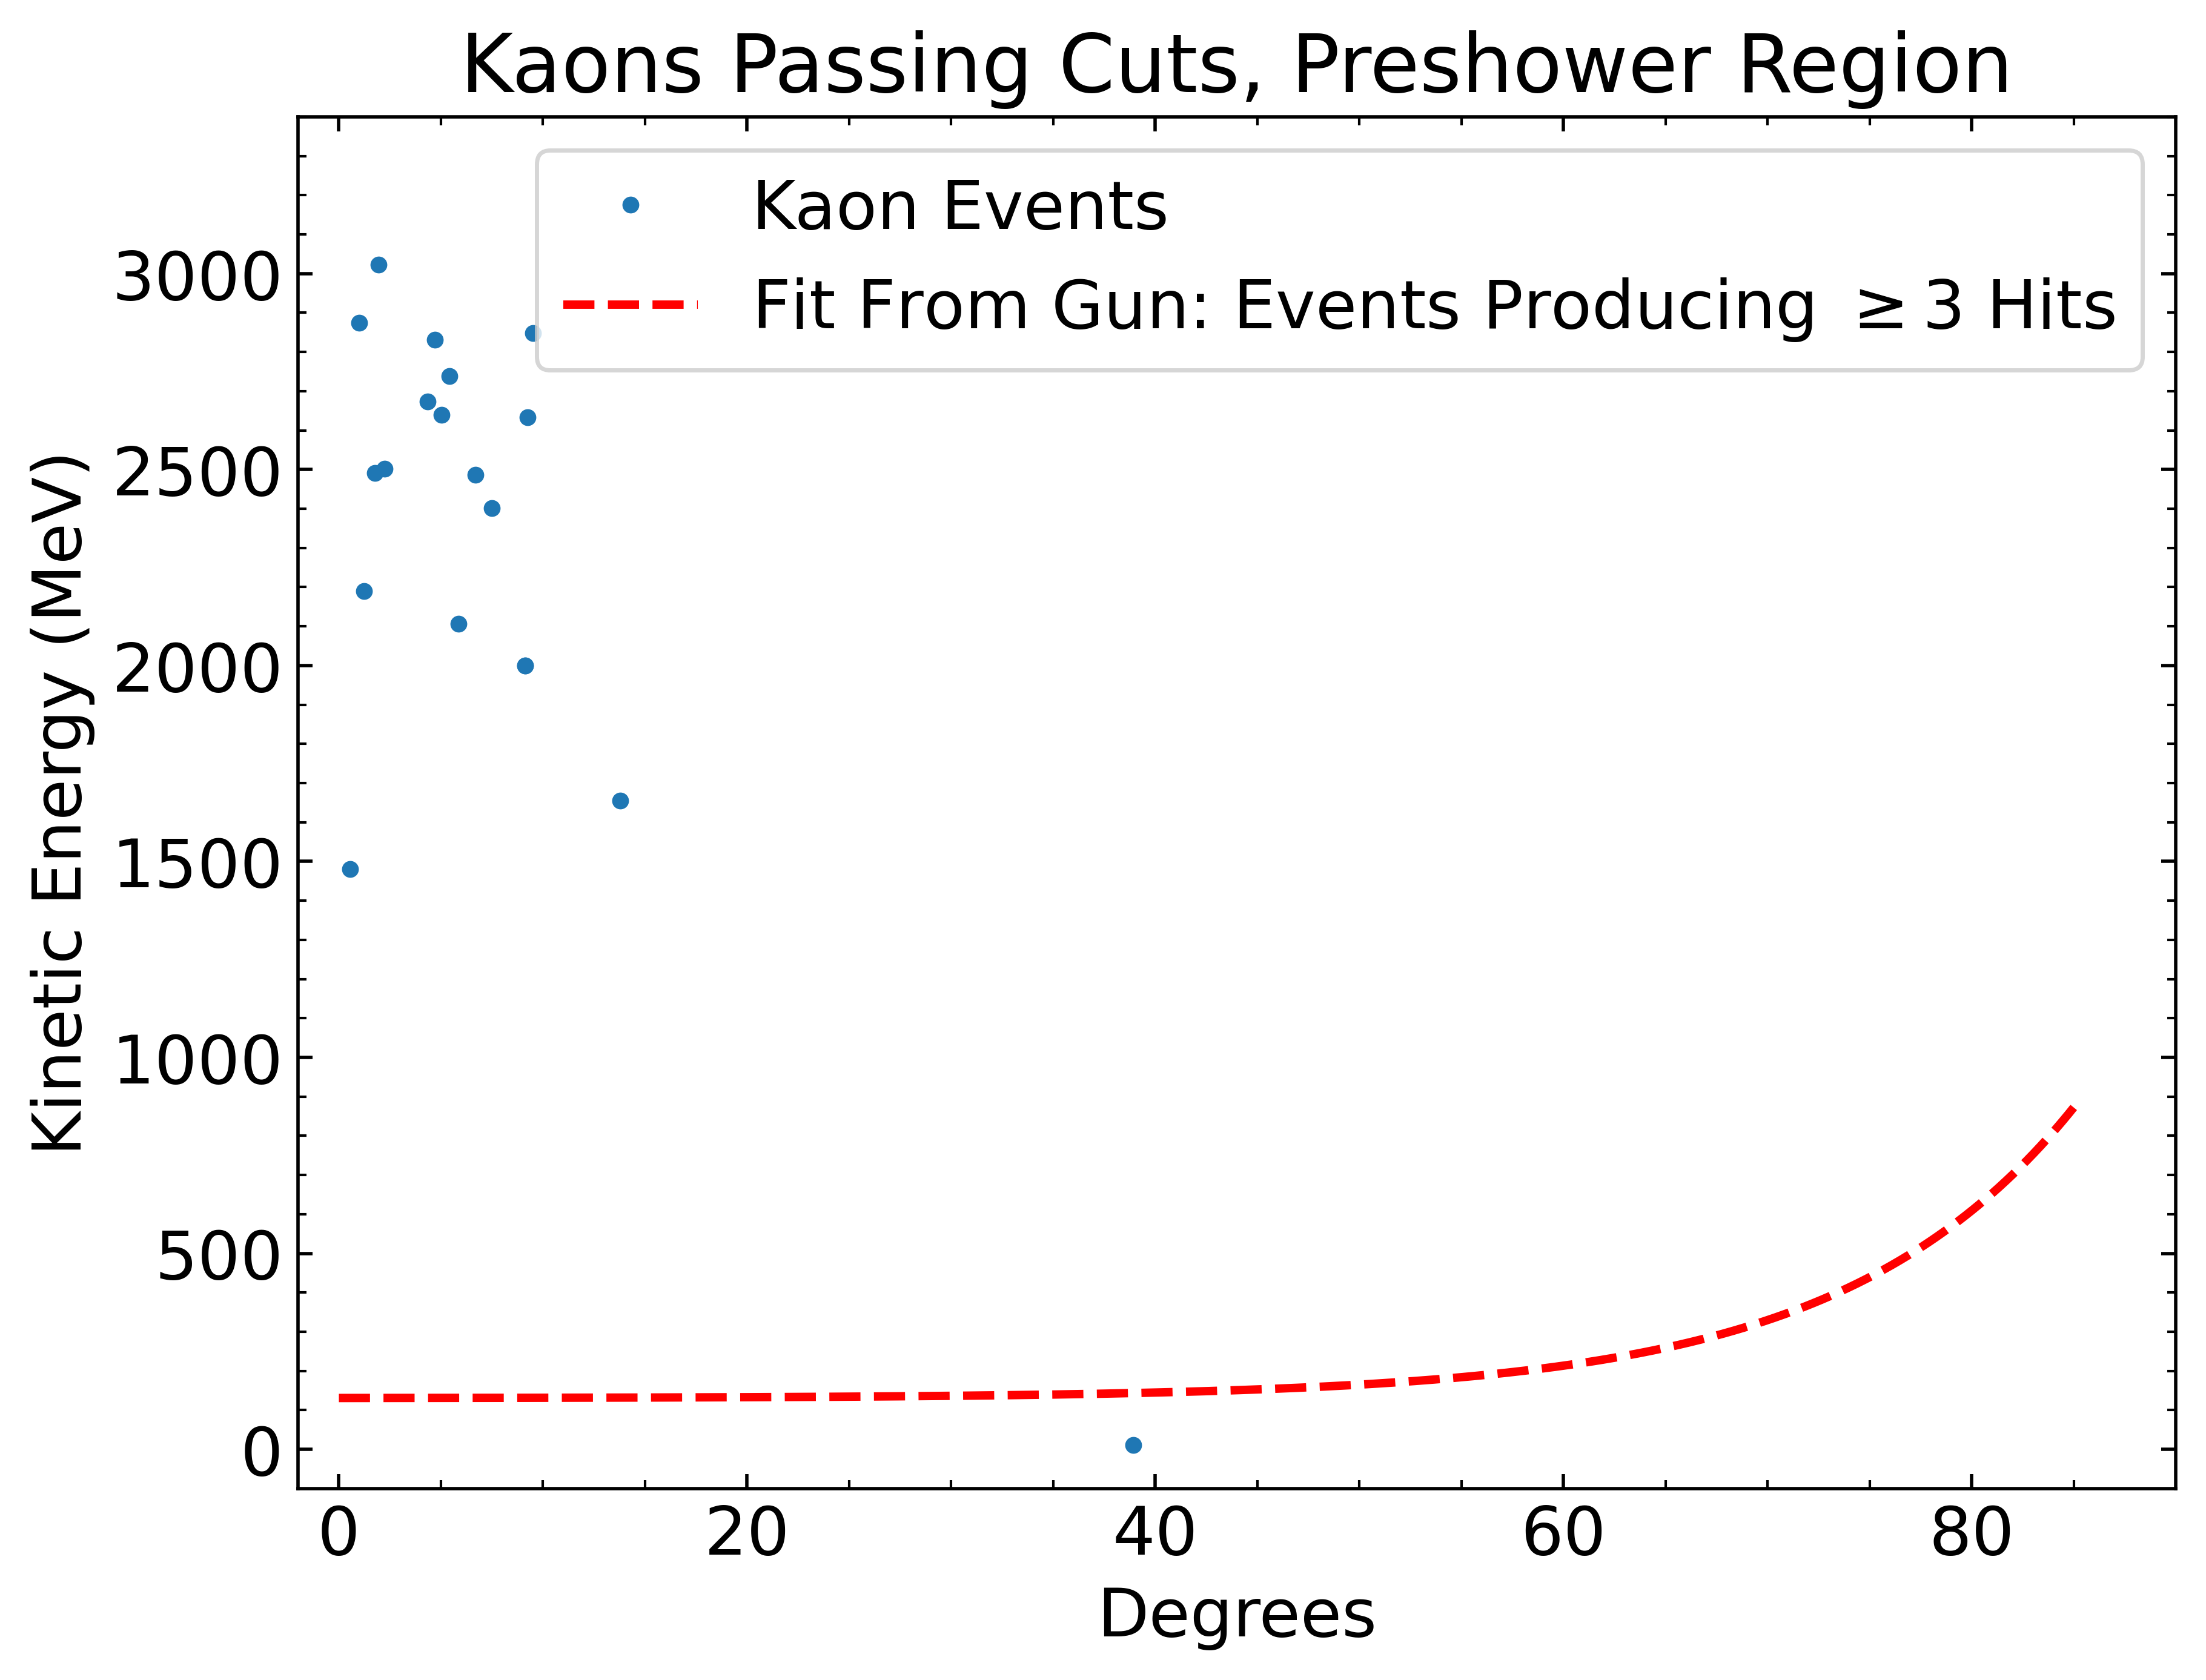

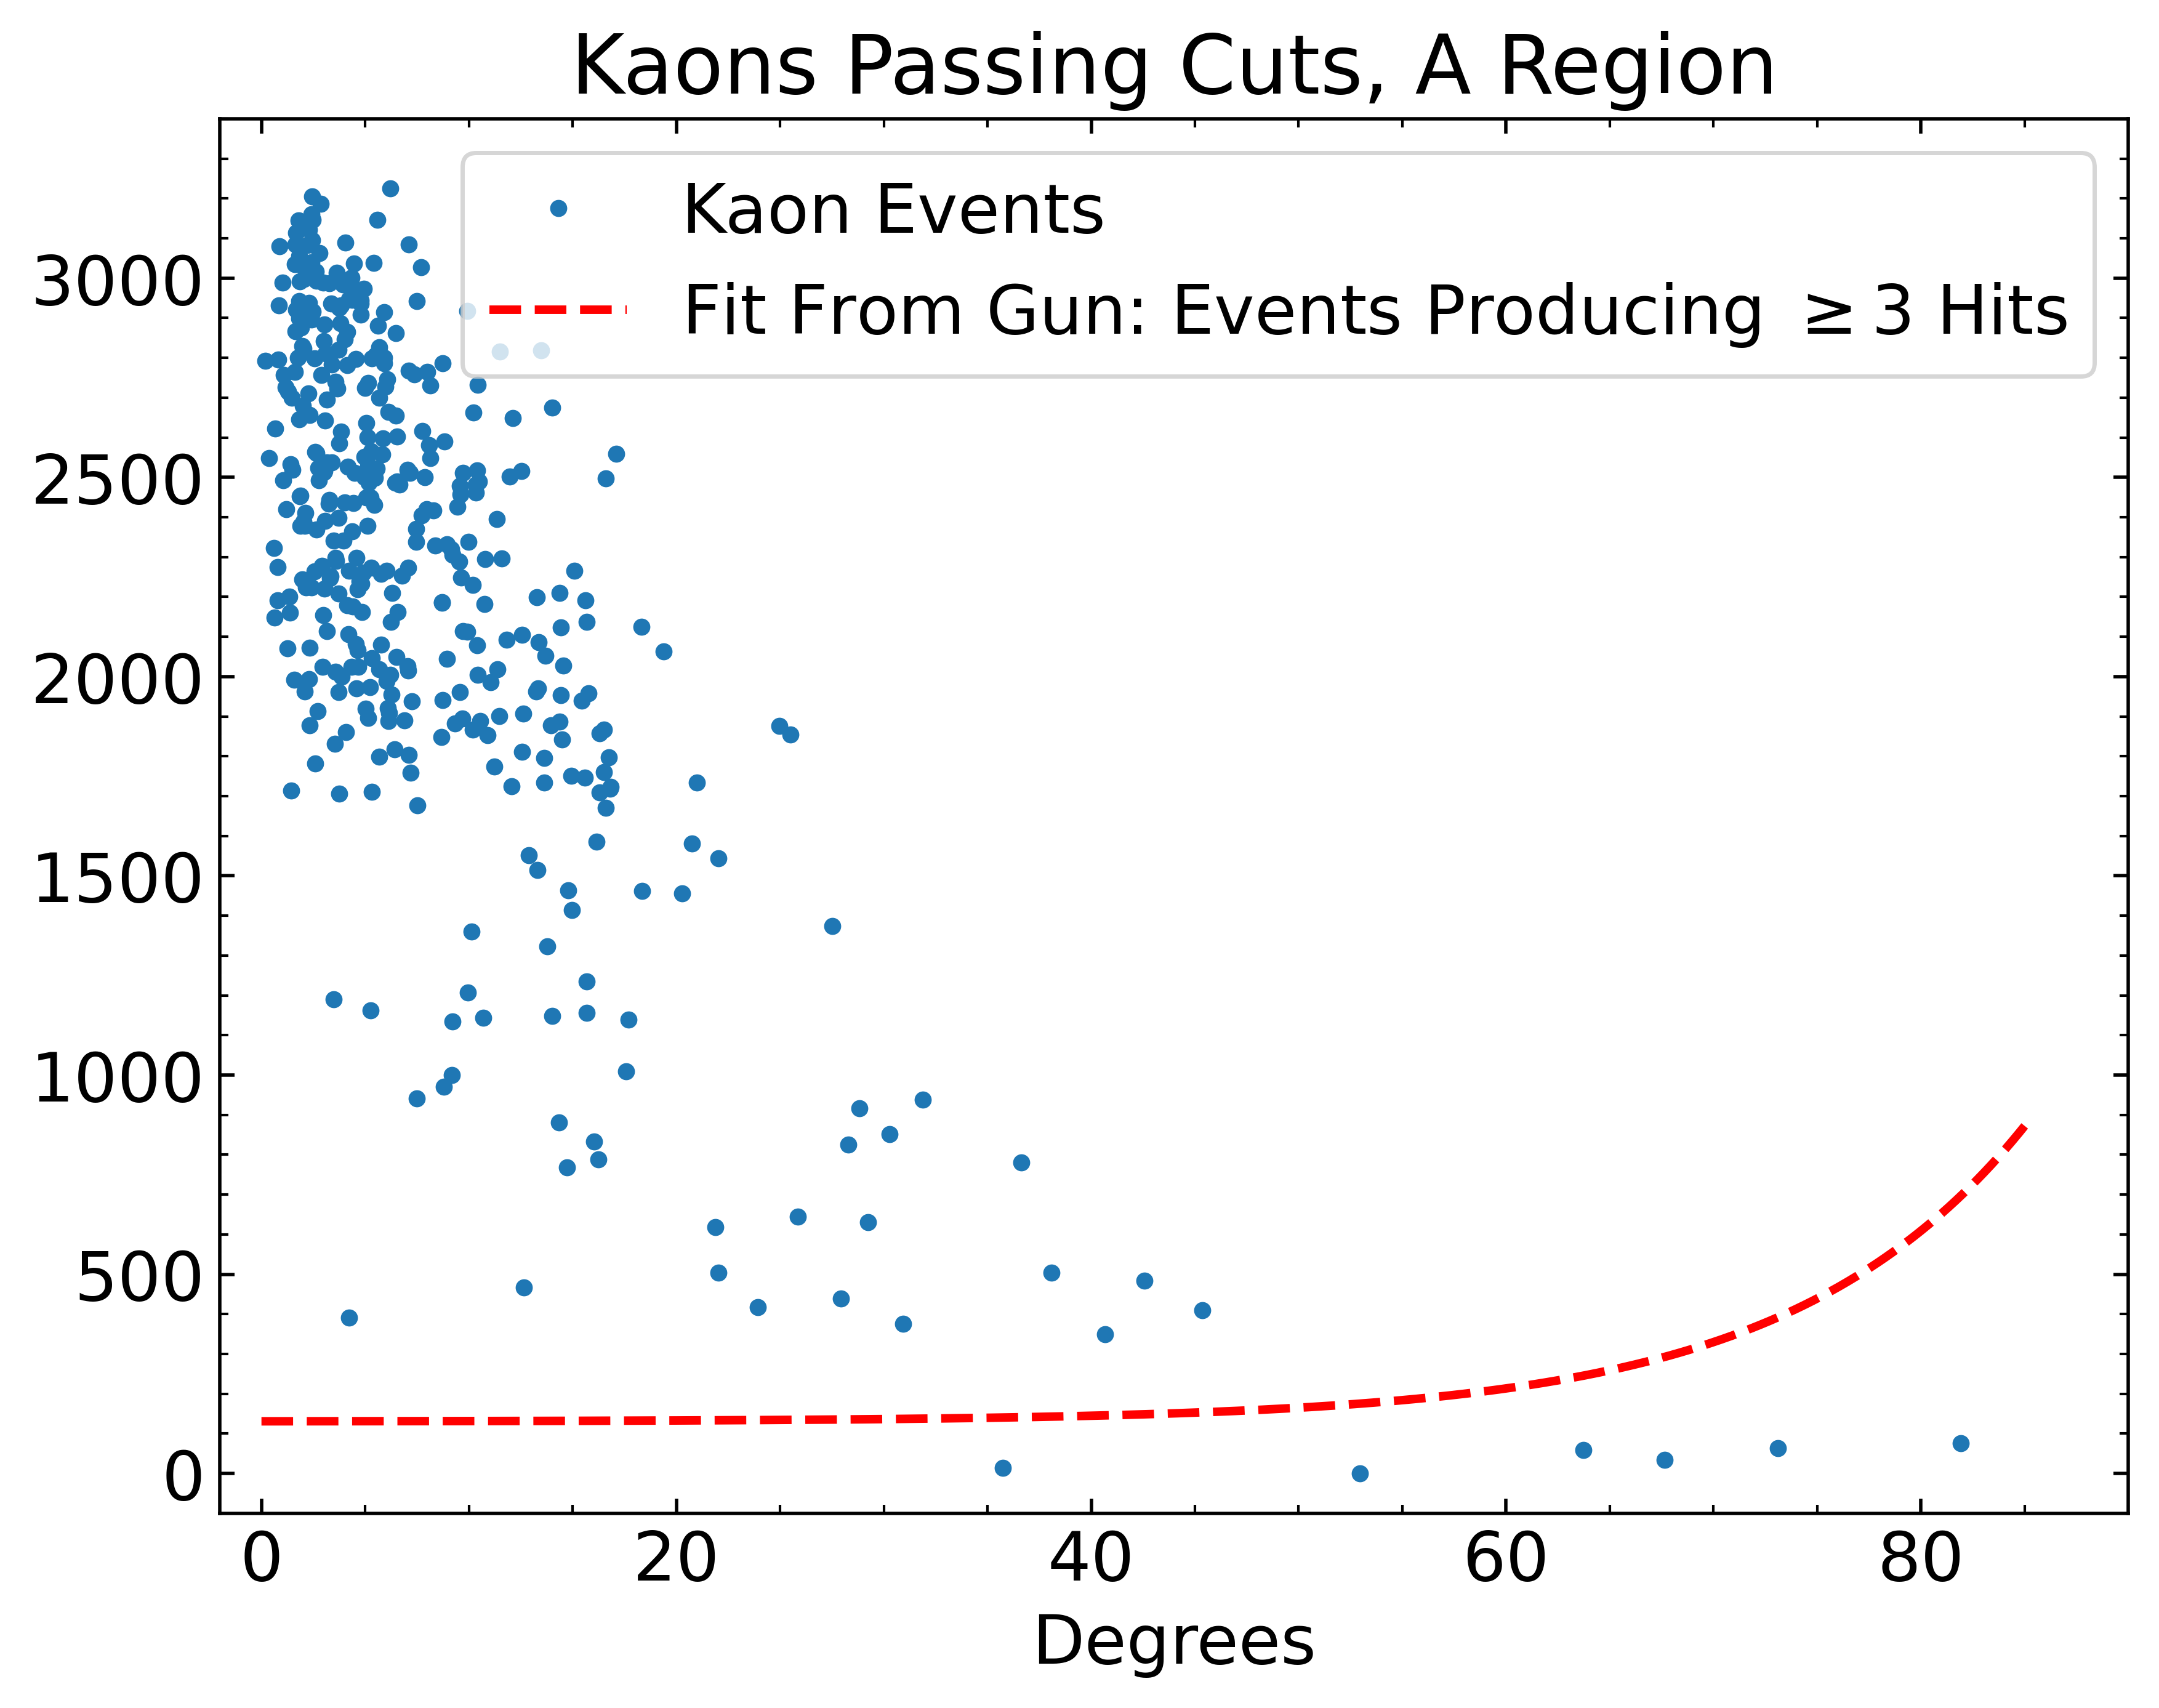

In [40]:
# scatter with just angle and energy, but for various layers

# constants of geometry
ecal_start = 240
preshow = 20.1
athick = 20.35
bthick = 22.35
cthick = 25.1*9

#figure out which category the event is in. 
preshow_KE = []
preshow_theta = []
a_KE = []
a_theta = []
b_KE = []
b_theta = []
c_KE = []
c_theta = []
d_KE = []
d_theta = []

for i in range(len(z)):
    if z[i] < ecal_start + preshow:
        preshow_KE.append(KE[i])
        preshow_theta.append(theta[i])
    elif z[i] < ecal_start + preshow + athick:
        a_KE.append(KE[i])
        a_theta.append(theta[i])
    elif z[i] < ecal_start + preshow + athick + bthick:
        b_KE.append(KE[i])
        b_theta.append(theta[i])
    elif z[i] < ecal_start + preshow + athick + bthick + cthick:
        c_KE.append(KE[i])
        c_theta.append(theta[i])
    else:
        d_KE.append(KE[i])
        d_theta.append(theta[i])
        
len_p = len(preshow_KE)
len_a = len(a_KE)
len_b = len(b_KE)
len_c = len(c_KE)
        
print("preshower len + aves: %.2f %.2f, %.2f" % (len_p,sum(preshow_KE)/len_p,sum(preshow_theta)/len_p))
print("a len + aves: %.2f %.2f, %.2f" % (len_a,sum(a_KE)/len_a,sum(a_theta)/len_a))
print("b len + aves: %.2f %.2f, %.2f" % (len_b,sum(b_KE)/len_b,sum(b_theta)/len_b))
print("c len + aves: %.2f %.2f, %.2f" % (len_c,sum(c_KE)/len_c,sum(c_theta)/len_c))


plt.figure(figsize=(8,6),dpi=500)
plt.plot(preshow_theta,preshow_KE,'.',label='Kaon Events')
plt.ylabel("Kinetic Energy (MeV)")
plt.xlabel("Degrees")
plt.title("Kaons Passing Cuts, Preshower Region")
plt.plot([200,200,3400],[40,60,60],linestyle='dashed',color='red',linewidth=2)
plt.xlim(-2,90)
plt.ylim(-100,3400)
plt.plot(xvals,yvals,label=r"Fit From Gun: Events Producing $\geq$3 Hits",linestyle='--',linewidth='2',color='red')
plt.legend()

plt.figure(figsize=(8,6),dpi=500)
plt.plot(a_theta,a_KE,'.',label='Kaon Events')
plt.xlabel("Degrees")
plt.title("Kaons Passing Cuts, A Region")
plt.plot([200,200,3400],[40,60,60],linestyle='dashed',color='red',linewidth=2)
plt.xlim(-2,90)
plt.ylim(-100,3400)
plt.plot(xvals,yvals,label=r"Fit From Gun: Events Producing $\geq$3 Hits",linestyle='--',linewidth='2',color='red')
plt.legend()

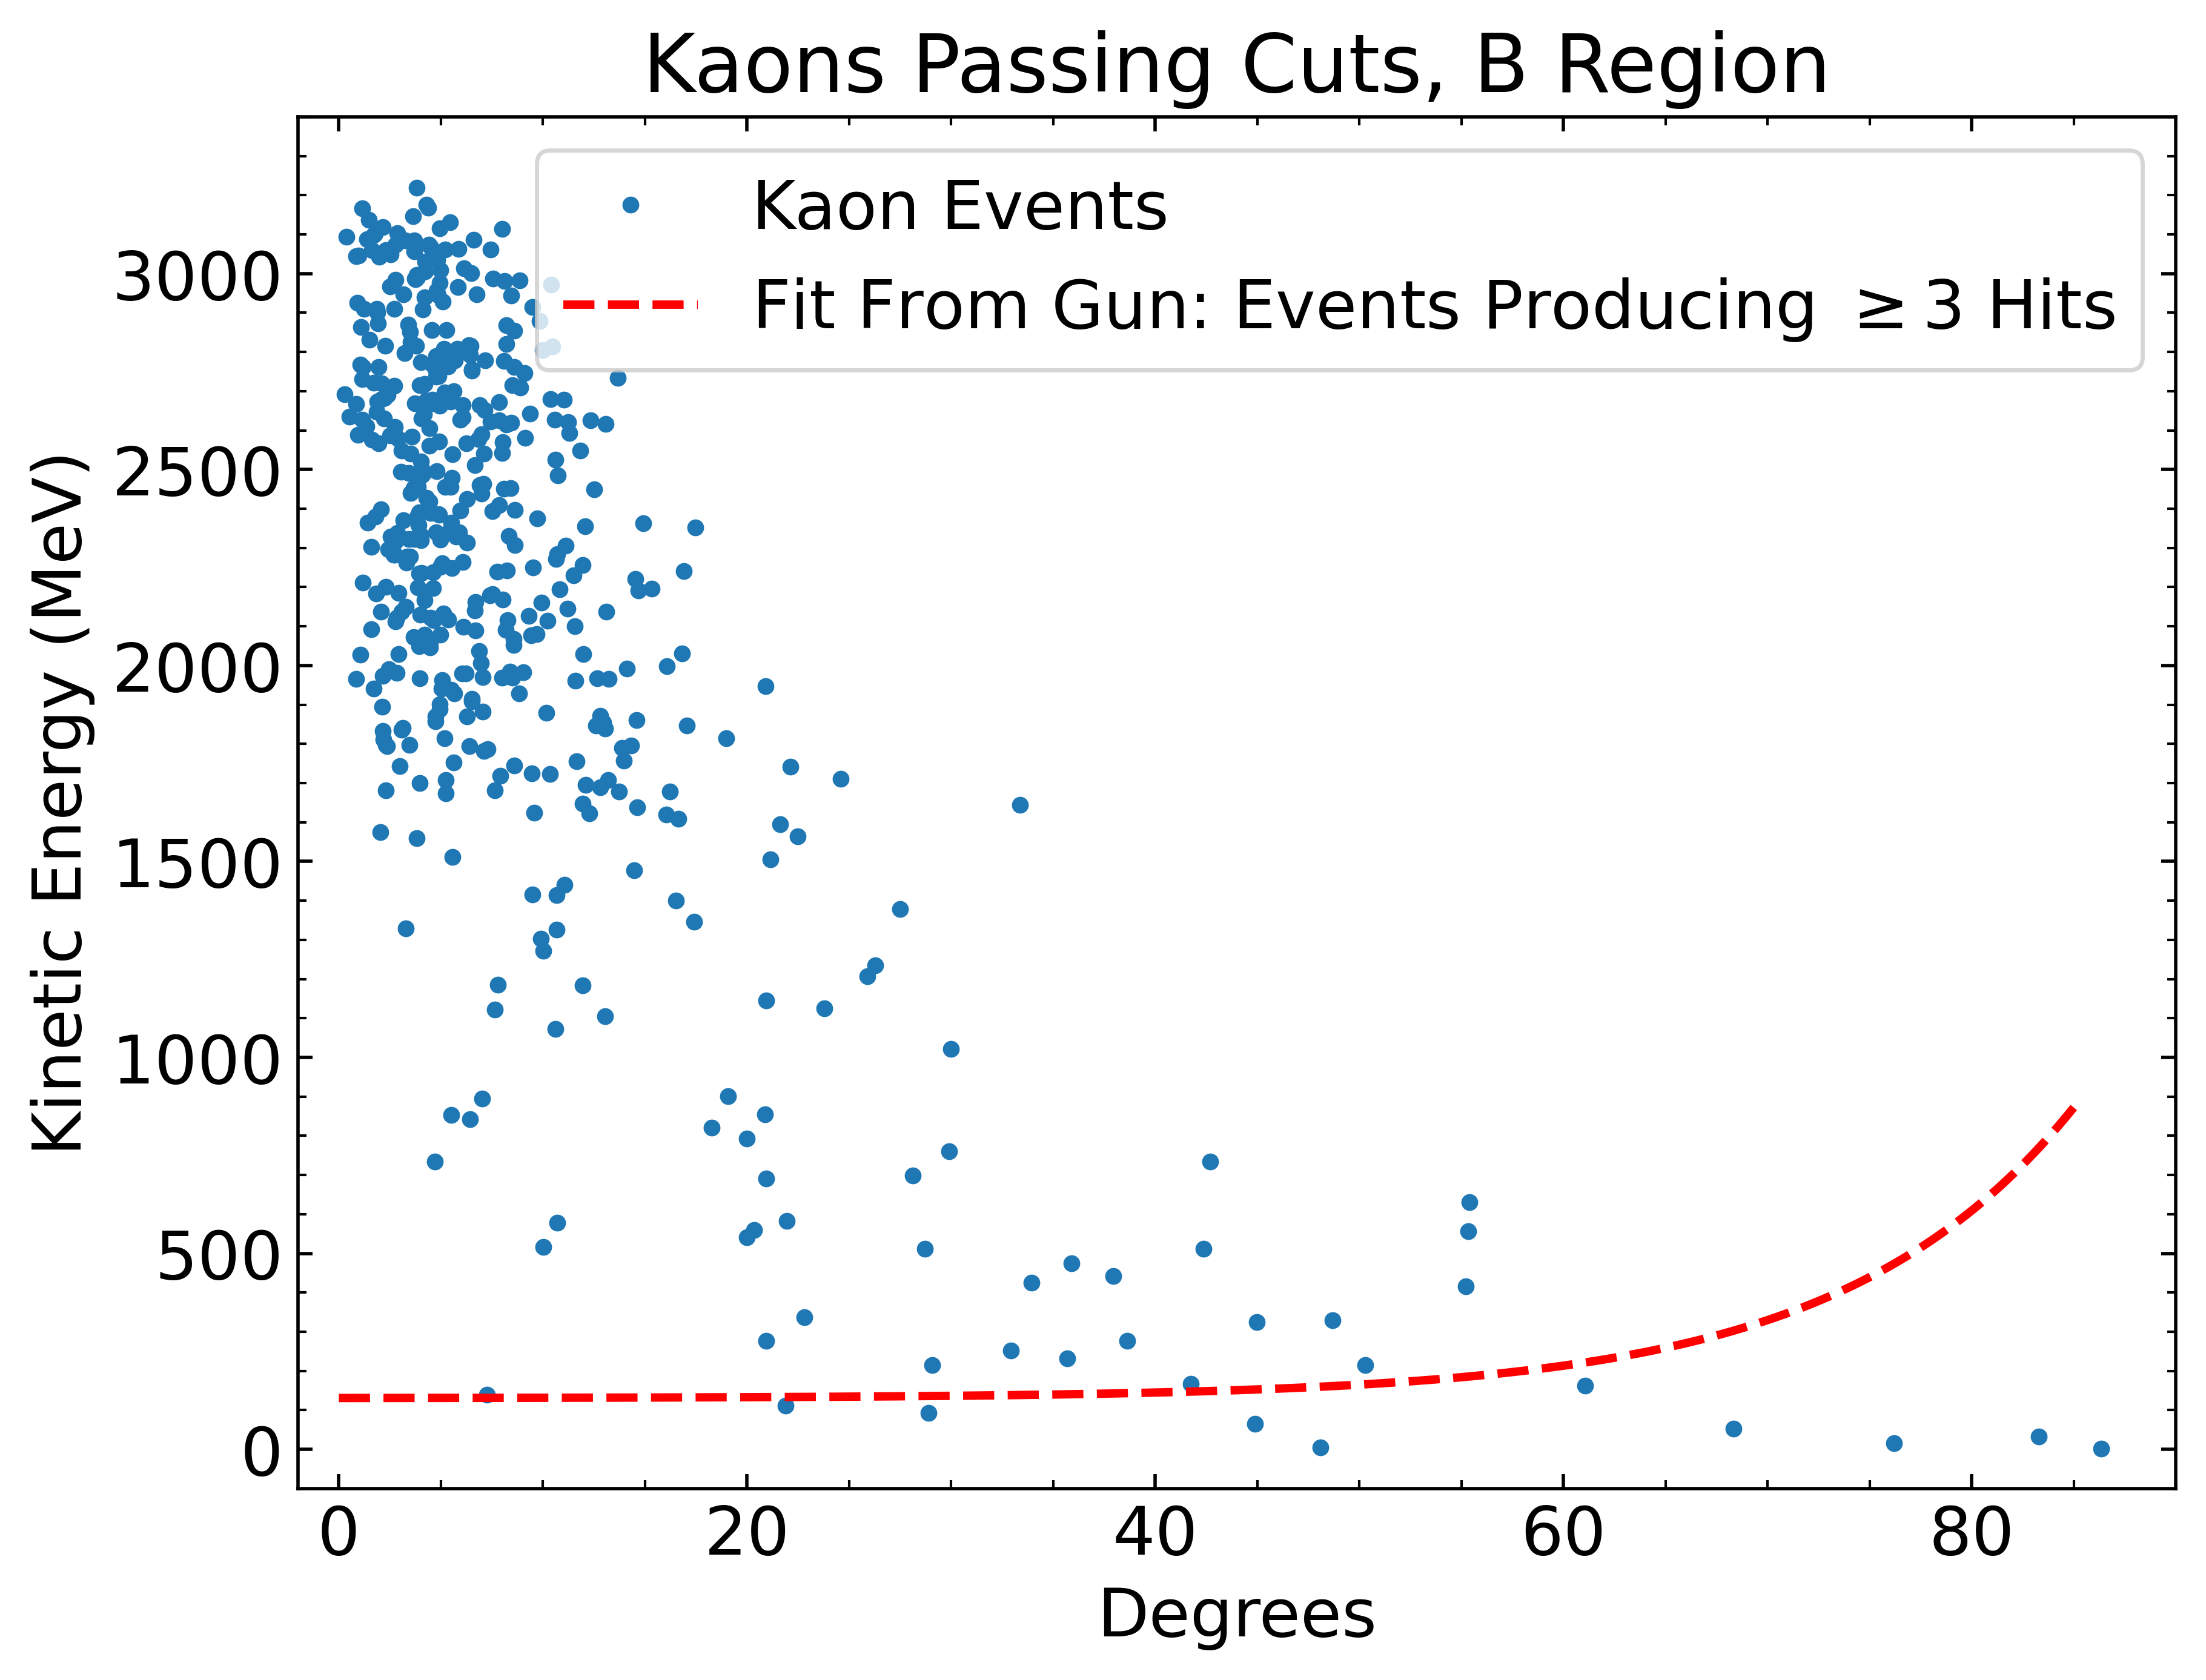

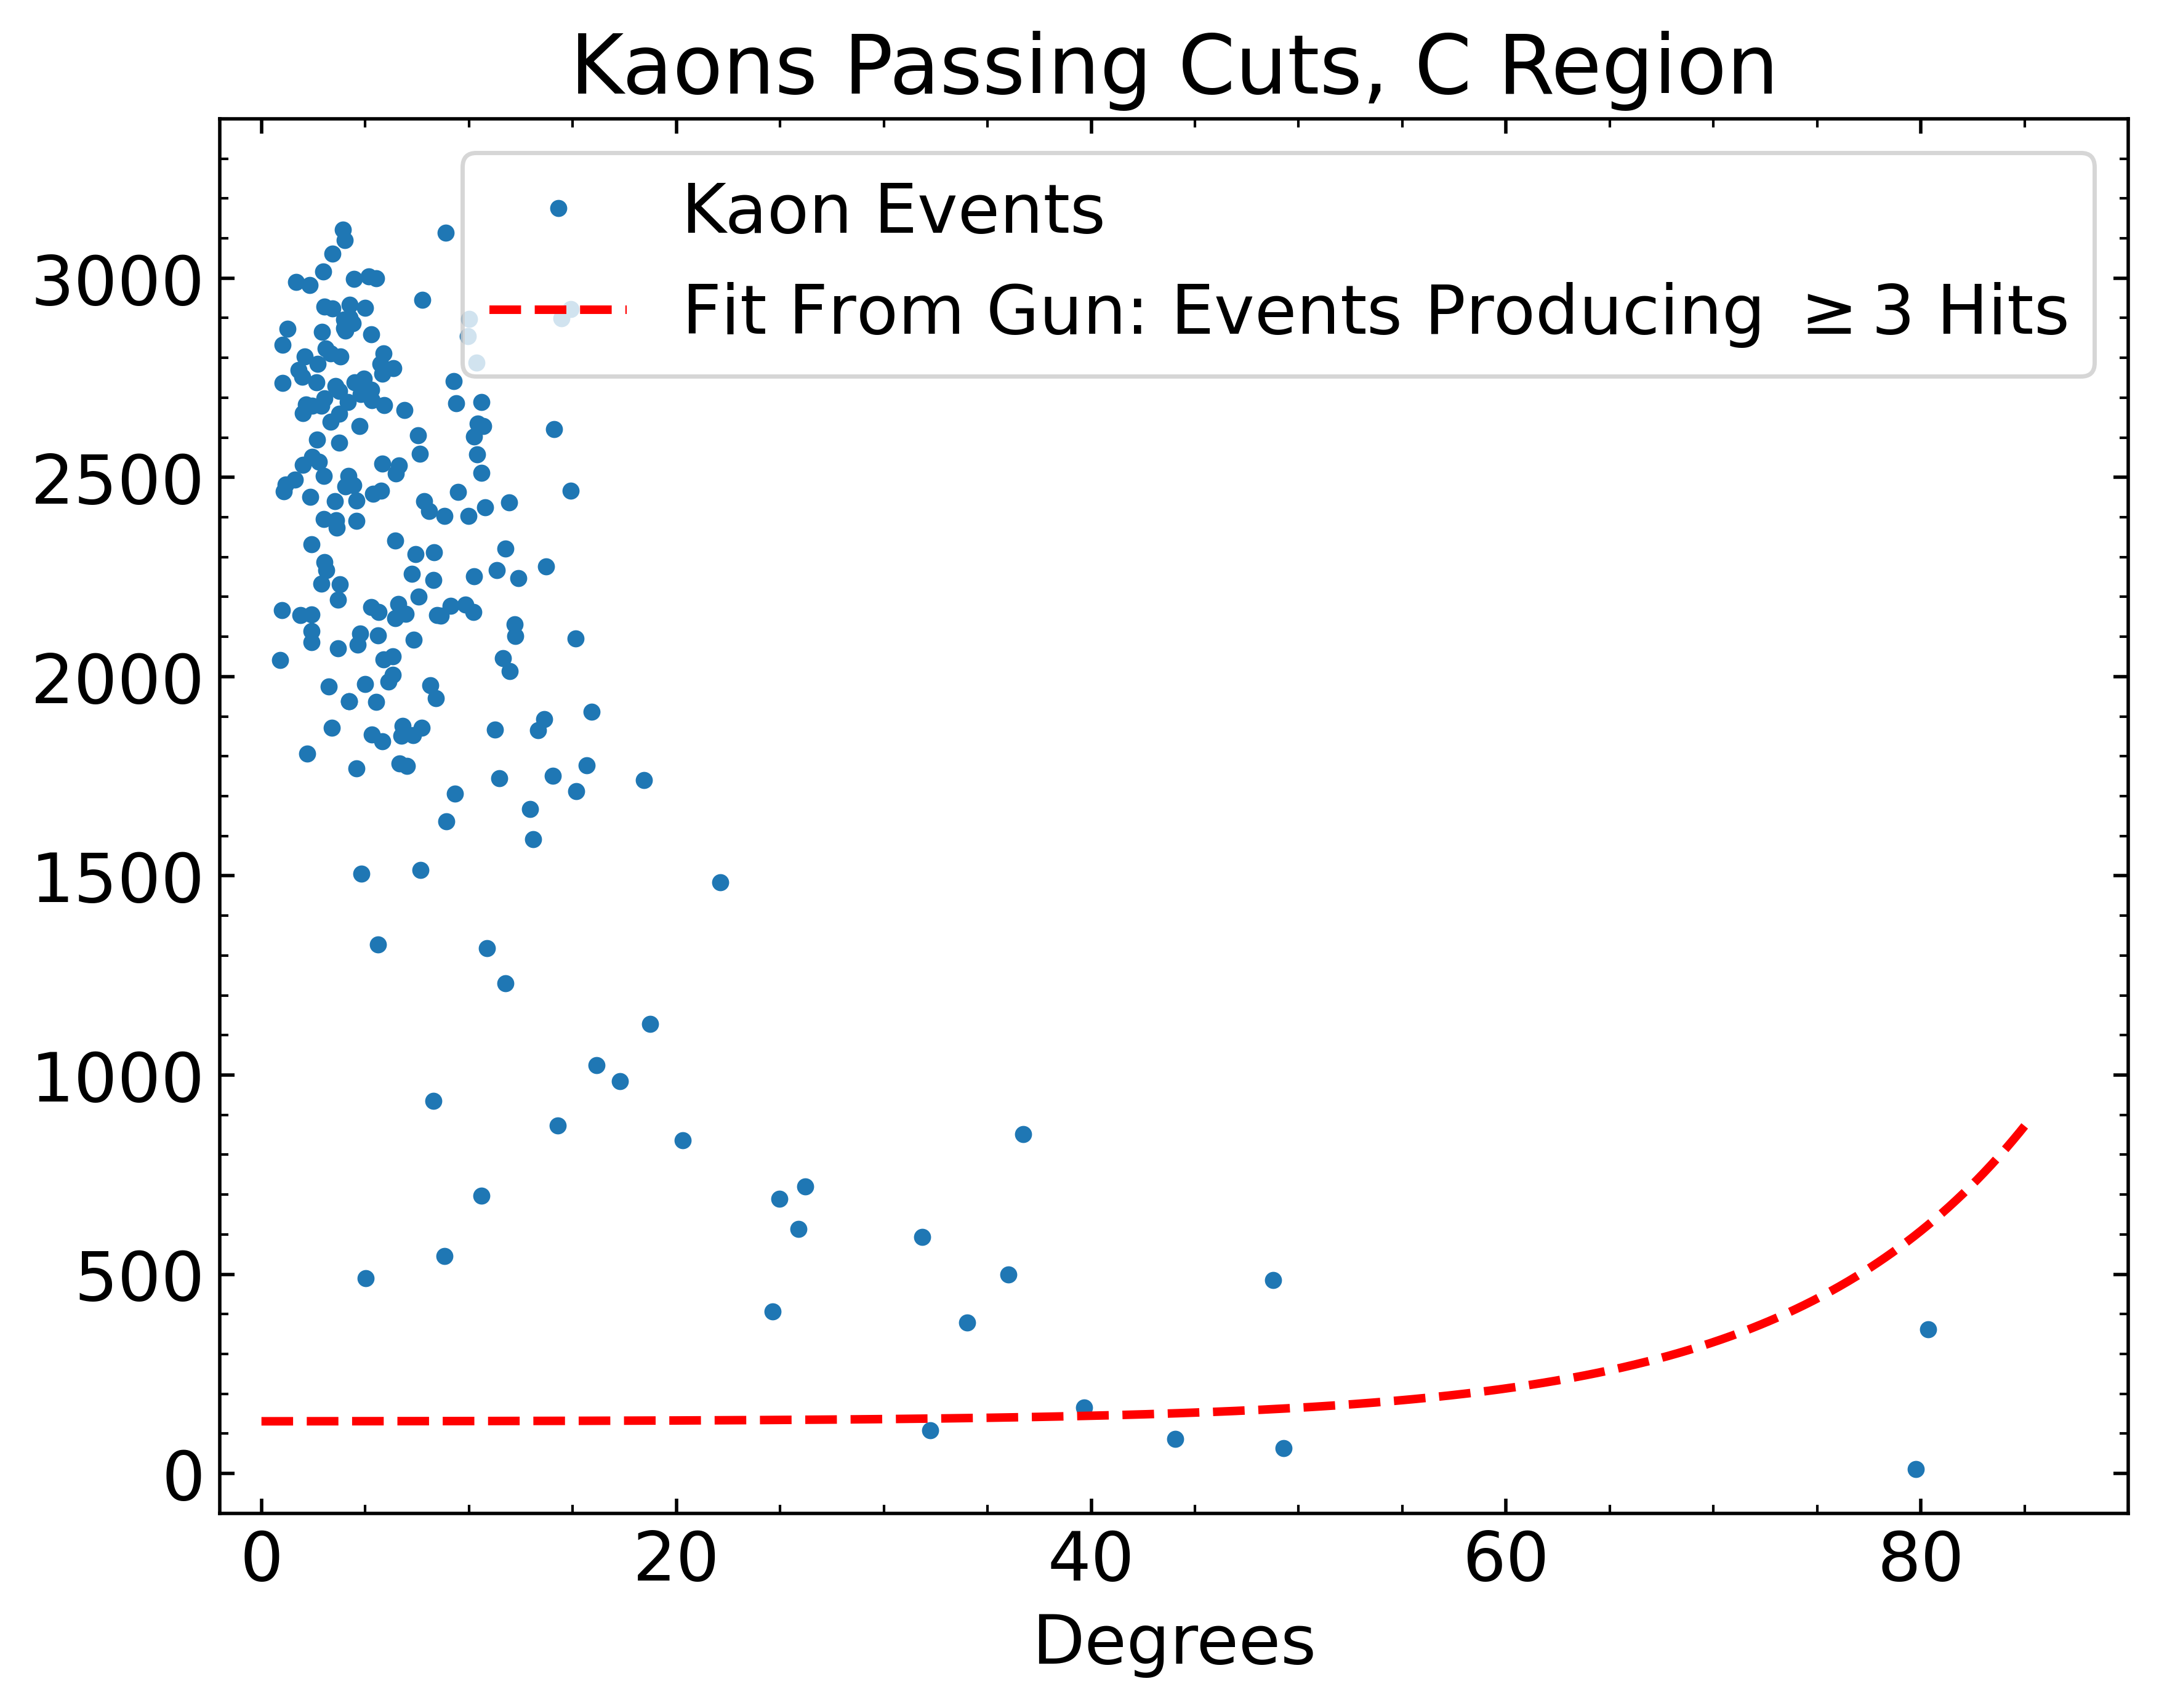

In [39]:
plt.figure(figsize=(8,6),dpi=500)
plt.plot(b_theta,b_KE,'.',label='Kaon Events')
plt.ylabel("Kinetic Energy (MeV)")
plt.xlabel("Degrees")
plt.title("Kaons Passing Cuts, B Region")
plt.plot(xvals,yvals,label=r"Fit From Gun: Events Producing $\geq$3 Hits",linestyle='--',linewidth='2',color='red')
plt.xlim(-2,90)
plt.ylim(-100,3400)
plt.legend()

plt.figure(figsize=(8,6),dpi=500)
plt.plot(c_theta,c_KE,'.',label='Kaon Events')
plt.xlabel("Degrees")
plt.title("Kaons Passing Cuts, C Region")
plt.plot([200,200,3400],[40,60,60],linestyle='dashed',color='red',linewidth=2)
plt.plot(xvals,yvals,label=r"Fit From Gun: Events Producing $\geq$3 Hits",linestyle='--',linewidth='2',color='red')
plt.xlim(-2,90)
plt.ylim(-100,3400)
plt.legend()

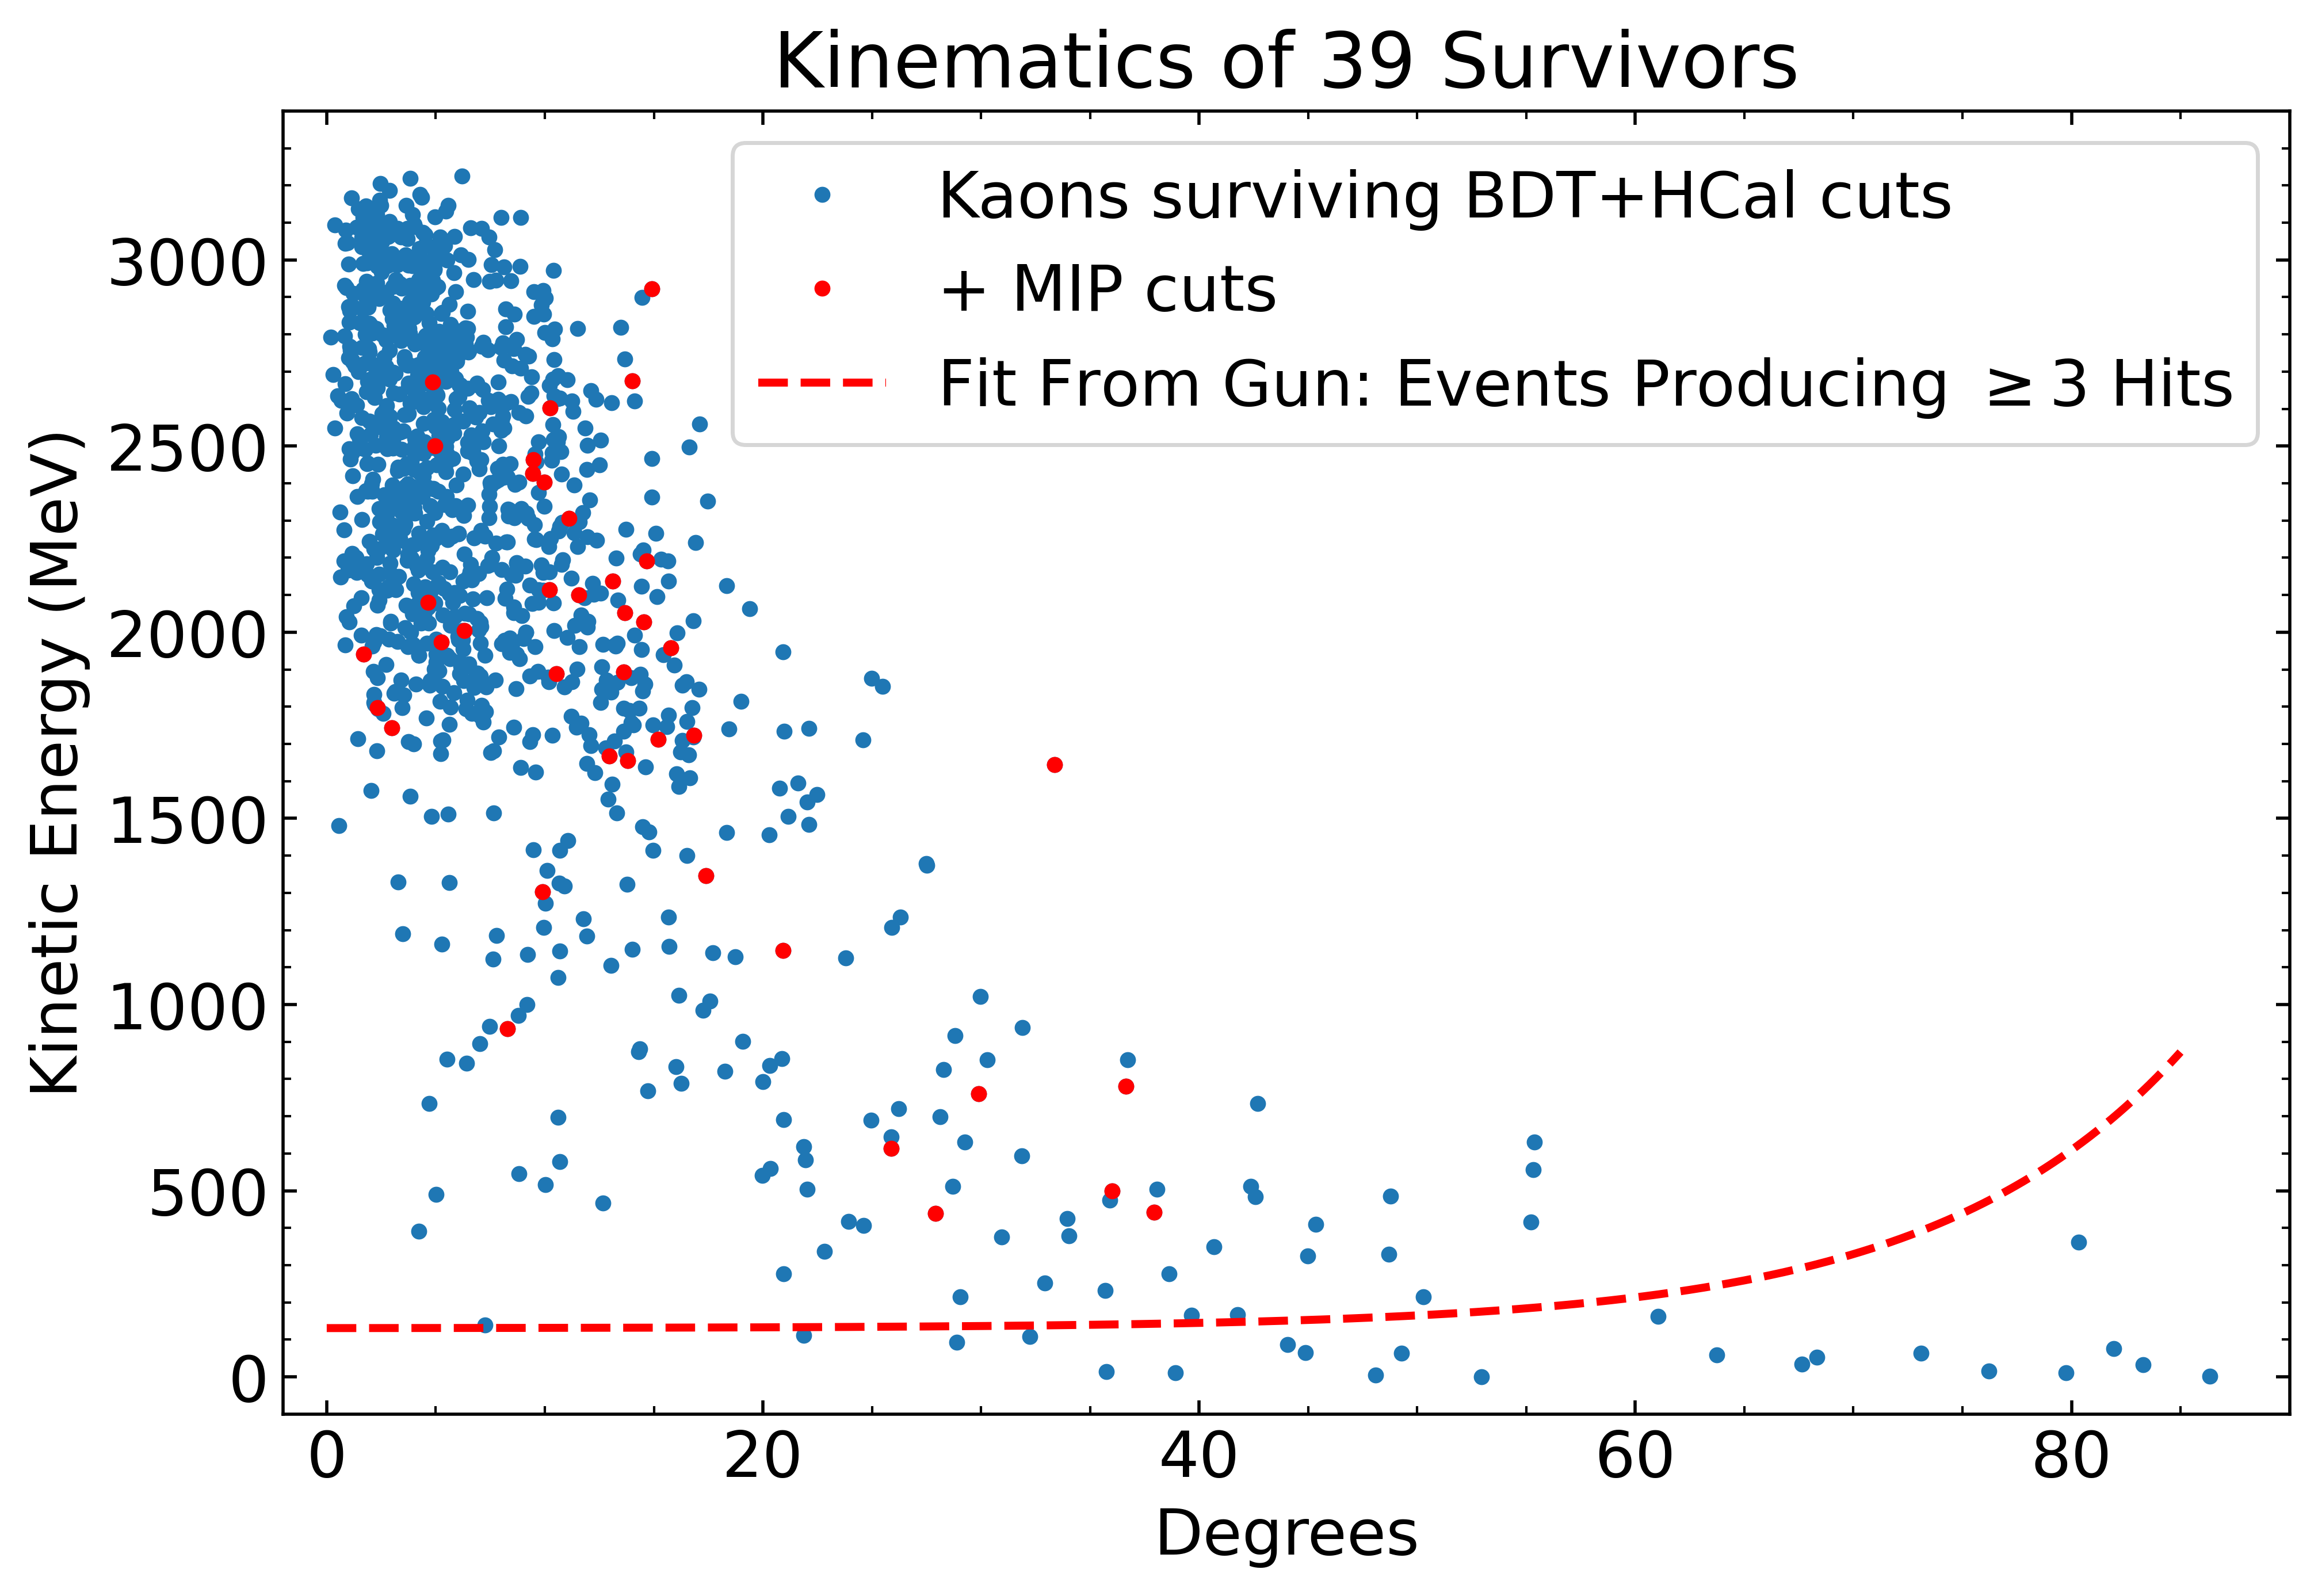

In [31]:
n_data = np.genfromtxt('/Users/chris/Desktop/ldmx/ldmx_files/kinematics_35events.txt',delimiter=',')
n_ids  = n_data[:,0]
n_E    = n_data[:,1]
n_pz   = n_data[:,2]
n_py   = n_data[:,3]
n_px   = n_data[:,4]
n_z    = n_data[:,5]
n_y    = n_data[:,6]
n_x    = n_data[:,7]

kmass = 493.7
n_KE = n_E - kmass

n_r = np.sqrt(n_px**2 + n_py**2)
n_tan_theta = n_r/np.abs(n_pz)
n_theta = np.arctan(n_tan_theta) * 180/np.pi


# Scatter plot comparing angle and energy
plt.figure(figsize=(9,6),dpi=500)
plt.plot(theta,KE,'.',label='Kaons surviving BDT+HCal cuts')
plt.plot(n_theta,n_KE,'.',color='red',label='+ MIP cuts')
plt.xlabel("Degrees")
plt.ylabel("Kinetic Energy (MeV)")
plt.title("Kinematics of 39 Survivors")

plt.plot([200,200,3400],[40,60,60],linestyle='dashed',color='red',linewidth=2)
plt.ylim(-100,3400)
plt.xlim(-2,90)

plt.plot(xvals,yvals,label=r"Fit From Gun: Events Producing $\geq$3 Hits",linestyle='--',linewidth='2',color='red')
# plot fit
#plt.plot(xvals,yvals,label=r"Fit From Gun: Events Producing $\geq$3 Hits",linestyle='--',linewidth='2',color='red')
plt.legend()

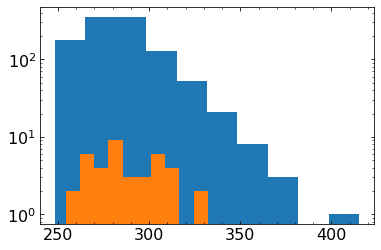

In [14]:


plt.hist(z)
plt.hist(n_z)
plt.yscale('log')

In [17]:
print(np.sort(n_z))

[254.46460504 261.33809421 268.01072403 268.2000445  268.22912522
 268.22912522 268.31512915 268.37562083 273.81184495 273.9516374
 274.25353433 274.39654514 280.99708453 281.05191215 281.24683534
 281.37327014 281.49746496 281.80349669 281.95952981 282.08886085
 283.04202807 290.03543056 290.58892972 290.58892972 296.59857745
 296.59857745 298.03088942 305.19460065 305.41868086 305.41868086
 305.87792588 306.76480064 306.92094053 315.12594625 315.12594625
 315.1428312  315.61742779 330.72625499 332.20582438]


Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec